In [1]:
import sys
sys.path.append('../..')
import python.mppy as mppy
from python.mluqmppy import *
import python.sgdmppy as sgdplot
from matplotlib import gridspec

mpp = mppy.Mpp(
    project_name='SGD',
    executable='M++',
    kernels=20,
    mute=False,
    build_dir='mpp/build-sgd',
    cmake_args=['-DMPP_BUILD_TYPE=MppRelease', '-DBUILD_UQ=On']
)

mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/ardar/mpp/build-sgd
-- PROJECT_SOURCE_DIR= /home/ardar/mpp
-- PROJECT_MPP_DIR=    /home/ardar/mpp
-- Option:     BUILD_UQ= On   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     USE_SPLITTED_COMMS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-

0

Die folgende Funktion dient im weiteren Verlauf dazu $j(u_k)-j(u_{k-1})$ zu berechnen.

In [2]:
def diff_iter(v):
    u = np.roll(v,1)
    u[0] = 0.125
    v = np.array(v)
    return np.abs(u-v)

In [3]:
np.min([0.124855, 0.124791, 0.124796, 0.124787, 0.124786, 0.124796, 0.124794, 0.124795, 0.124791, 0.124787, 0.12477, 0.124769, 0.124771, 0.124767, 0.124767, 0.124776, 0.124777, 0.124765, 0.124763, 0.12477, 0.124768, 0.124786, 0.124778, 0.124764, 0.124771, 0.124767, 0.124782, 0.124768, 0.124764, 0.12477, 0.124765, 0.124776, 0.124772, 0.124758, 0.12477, 0.124769, 0.124765, 0.12477, 0.124762, 0.124762, 0.124764, 0.124768, 0.12476, 0.124764, 0.124774, 0.124767, 0.124766, 0.124758, 0.124765, 0.124767, 0.124768, 0.124766, 0.12477, 0.124764, 0.124762, 0.12477, 0.124762, 0.124765, 0.124768, 0.124767, 0.124763, 0.124761, 0.124766, 0.124758, 0.124763, 0.124771, 0.124758, 0.124769, 0.124771, 0.124764, 0.124765, 0.12476, 0.124756, 0.124764, 0.124775, 0.124771, 0.124768, 0.124771, 0.124765, 0.124749, 0.124761, 0.124768, 0.124763, 0.124761, 0.12476, 0.124761, 0.124774, 0.124762, 0.12476, 0.124763, 0.124762, 0.124776, 0.124759, 0.124767, 0.124769, 0.124762, 0.124775, 0.124768, 0.124769, 0.124763, 0.124767, 0.124761, 0.124761, 0.124755, 0.124768, 0.124764, 0.124765, 0.124762, 0.124755, 0.124765, 0.124768, 0.124762, 0.124766, 0.12476, 0.12477, 0.124764, 0.12477, 0.124769, 0.124766, 0.124775, 0.124766, 0.124765, 0.124765, 0.12476, 0.124753, 0.124756, 0.124774, 0.124762, 0.124757, 0.124759, 0.124765, 0.124761, 0.124751, 0.124767, 0.124764, 0.124762, 0.124765, 0.124755, 0.124772, 0.12476, 0.124769, 0.124766, 0.124765, 0.124771, 0.124768, 0.124765, 0.124766, 0.124767, 0.124771, 0.124762, 0.124771, 0.124768, 0.124766, 0.124763, 0.124764, 0.124761, 0.124757, 0.124764, 0.124759, 0.124768, 0.12476, 0.124761, 0.124759, 0.124764, 0.124762, 0.124766, 0.12476, 0.124761, 0.124769, 0.12475, 0.124763, 0.124767, 0.124766, 0.124761, 0.124764, 0.124759, 0.124774, 0.124771, 0.124763, 0.124767, 0.12477, 0.124775, 0.124763, 0.124759, 0.124776, 0.124755, 0.124768, 0.124759, 0.124769, 0.124762, 0.12476, 0.124758, 0.124762, 0.124773, 0.124759, 0.124762, 0.124764, 0.124764, 0.124775, 0.12476, 0.124761, 0.124768, 0.124766, 0.124756, 0.12476, 0.124762, 0.124761, 0.124766, 0.124767, 0.124759, 0.124763, 0.124766, 0.124767, 0.124768, 0.124769, 0.124767, 0.12477, 0.124765, 0.124754, 0.124761, 0.124769, 0.12475, 0.124767, 0.124762, 0.124767, 0.124764, 0.124762, 0.124766, 0.124757, 0.124763, 0.124762, 0.124767, 0.124763, 0.124762, 0.124764, 0.124765, 0.124763, 0.124771, 0.124767, 0.124771, 0.124768, 0.124757, 0.124762, 0.124758, 0.124765, 0.124767, 0.124764, 0.124768, 0.12476, 0.124763, 0.124765, 0.124766, 0.124768, 0.124766, 0.124763, 0.124769, 0.124758, 0.124761, 0.124763, 0.124758, 0.124765, 0.124766, 0.124766, 0.124768, 0.124759, 0.124767, 0.124773, 0.12477, 0.124765, 0.124763, 0.124773, 0.124757, 0.124763, 0.124752, 0.124756, 0.124761, 0.124756, 0.124755, 0.124762, 0.124766, 0.124765, 0.124769, 0.124766, 0.124767, 0.124765, 0.124766, 0.124768, 0.124763, 0.12477, 0.124763, 0.124767, 0.124761, 0.124761, 0.124759, 0.124769, 0.124763, 0.124765, 0.124767, 0.12477, 0.124764])

0.124749

In [4]:
font = {'family': 'DejaVu Sans',
        'weight': 'normal',
        'size': 30}

Erklärung: Im folgenden Notebook werden einige Beispiele mit stochastischen Gradientenverfahren gelöst. Der Algorithmus ist dabei grob wie im bisherigen Stand der Masterarbeit aufgebaut, jedoch sind einzelne Features noch nicht implementiert (Mehr dazu auch im Kapitel Implementierung). Das erste Beispiel betrachtet ein deterministisches Problem, welches auf eine Laplace Gleichung reduziert wurde. Dadurch kann an diesem Beispiel die Konvergenz des Algorithmus untersucht werden, da eine entsprechende Referenzlösung berechnet werden kann. Weiter unten wird dann eine optimales Kontrollproblem unter Unsicherheiten betrachtet, wie es auch in der Masterarbeit betrachtet werden könnte. Der Fokus im zweiten Beispiel liegt darauf, dass verschieden Parameter des Algorithmus wie die unterschiedlichen Schrittweitensteuerungen verglichen werden. Da in diesem Fall noch keine Referenzlösung berechnet wurde (wir sind bisher noch unschlüssig wie dies am besten geschehen sollte), kann die Konvergenz nicht über einen Fehlerterm betrachet werden. Mehr dazu weiter unten.

### Beispiel 1: Determinstisches Problem
Im Folgenden betrachten wir das optimale Kontrollproblem

\begin{alignat}{3}\label{eq:MP1}
	(P)\quad \min_{u\in X_{ad}}             &\quad&  j(u):=\mathbb{E}[J(u, \xi)]:=\mathbb{E}&\left[\frac{1}{2}\left\|y-y^{D}\right\|_{L^2(D)}^{2}\right]+&&\frac{\lambda}{2}\|u\|_{L^2(D)}^{2} \\
	\text{unter} &\quad& -\nabla \cdot(a(x, \xi) \nabla y(x, \xi))    & =u(x), && (x, \xi) \in D \times \Xi \label{eq:MP_restr1}\\
	&\quad&   y(x, \xi)                       & =0,   && (x, \xi) \in \partial D \times \Xi \label{eq:MP_restr2},
\end{alignat}
wobei
\begin{equation}
	X_{ad}:=\left\{u \in L^2(D): u_{a}(x) \leq u(x) \leq u_{b}(x) \text{ für fast alle } x \in D\right\}.
\end{equation}

Für den Algorithmus den wir verwenden, betrachten wir genauer die diskretisierte Variante der schwachen Formulierung und lösen diese dann mit dem stochastischen Gradientenverfahren.

Für die vereinfachte Darstellung und die Entwicklung des Algorithmus wurden im ersten Fall Parameter gewählt, welche das Problem auf ein deterministisches Problem reduzieren. Der Vorteil den wir daraus ziehen ist, dass wir eine Referenzlösung berechnen können und anhand dieser die Konvergenz des Algorithmus überprüfen können.

Hierzu wurde $D=[0,1]^2$, $a(x)=1$, $y^D=sin(2\pi x_1)sin(2\pi x_2)$ und $\lambda=0$ gewählt. Dies führt dazu, dass zur optimalen Steuerung $u$ der zugehörige Zustand $y^D$ ist. Um dies zu demonstrieren, untersuchen wir im Folgenden den Fehler von $y$ also $\left\|y-y^{D}\right\|_{L^2(D)}$.
Es gilt außerdem $u_a=-\infty$ und $u_b=+\infty$, sodass $X_{ad}=L^2(D)$ ist.
\begin{alignat}{3}
	(P)\quad \min_{u\in L^2(D)}             &\quad&  j(u):=&\frac{1}{2}\left\|y-y^{D}\right\|_{L^2(D)}^{2}+&&\frac{\lambda}{2}\|u\|_{L^2(D)}^{2} \\
	\text{ unter } &\quad& -\Delta y(x)    & =u(x), && x \in D\\
	&\quad&   y(x)                       & =0,   && x \in \partial D,
\end{alignat}


In [5]:
mpp.reset_data()
n=6
#todo change stepsize
for i in range(2,n):
    mpp.run(4, config="SGD", kwargs={"Problem": "OptimalLaplace2D", "VtuPlot": 0, "level": i, "max_steps": 100, "alpha": 1, "D_ad": 750, "c": 1, "step_size_rule": "constant", "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 1, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": 'SGD'})
    mpp.parse_json()


================ running  mpp ================

start program on 4 procs at Thu Feb  8 19:52:34 2024
Running on: TOQAJEW
   Config Info:
     alpha: ................................... 1
     AssembleVerbose: ......................... 0
     c: ....................................... 1
     ConfigVerbose: ........................... 1
     D_ad: .................................... 750
     degree: .................................. 1
     descent_type: ............................ SGD
     est_sample_size: ......................... 1
     gamma: ................................... 800
     gamma_adam: .............................. 0.568
     GeneratorVerbose: ........................ 0
     GradEst: ................................. SGD
     lam_reg: ................................. 0.0
     lambda: .................................. [0.15, 0.15, 0.15]
     level: ................................... 2
     LinearVerbose: ........................... 0
     load_test: ...............

KeyError: 'u_k'

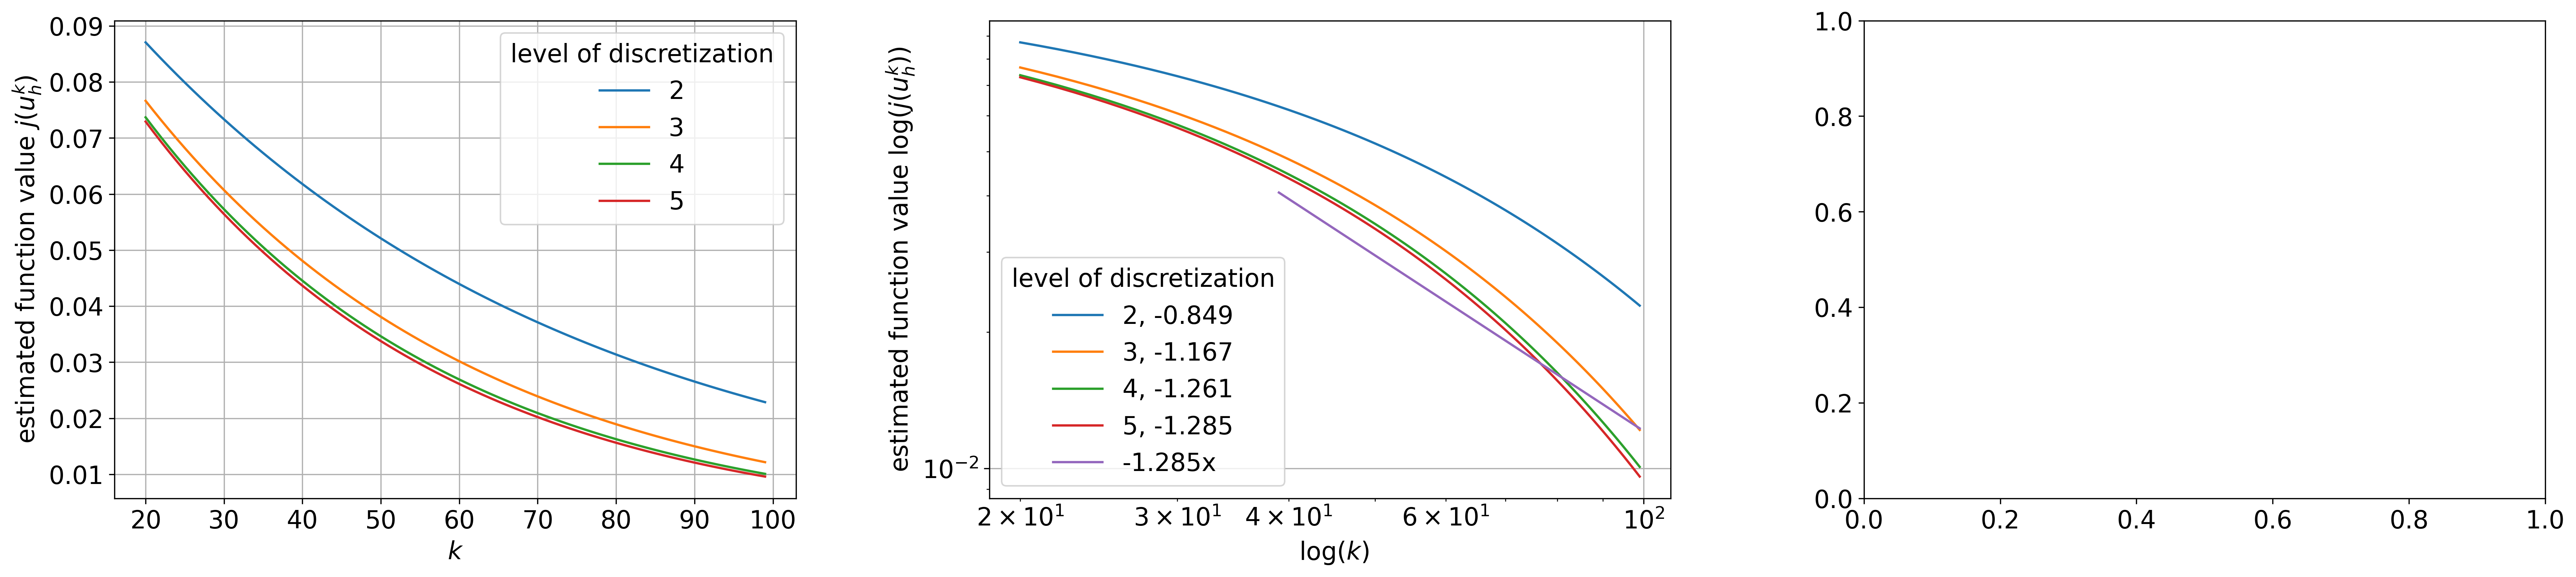

In [6]:
sgdplot.plot_results(mpp, 'test', plot_config='111', start=20)

Die folgenden Plots zeigen den Fehler des Zustands $y_k$ in Abhängigkeit der Iterationsschritte für verschiedene Level der Diskretisierung. Wie oben bereits beschrieben konvergiert der Zustand im Fall $\lambda=0$ gegen die Daten $y_D$, also wird der Fehler hier mithilfe von $\Vert y_D-y\Vert_{L^2}$ berechnet und einmal im normalen und logarithmischen Plot dargestellt. Es ist zu sehen, dass der Fehler für $k\rightarrow\infty$ immer kleiner wird. Allerdings bleibt noch der Diskretisierungsfehler, weshalb der Term für größere Level der Diskretisierung noch einmal kleiner wird.

In [ ]:
n=7
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
for j in range(1,n-1):
    plt.plot(mpp.data["L2 Norm uk difference"][-j],label=str(n-j))
x = np.arange(1,101)
pyplot.plot(4*x**(-0.5), label="$4\cdot k^{-0,5}$")
pyplot.ylabel("$\Vert u_h^k-u_h^{k-1}\Vert_{L^2}$")
pyplot.xlabel("Iteration $k$")
plt.axis([0, 100, 0.0, 2.0])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Level der Diskretisierung")
pyplot.show()

Für die Vollständigkeit wird hier auch noch der Plot für $\Vert u_k\Vert_{L^2}$ beim deterministischen Problem gezeigt, dieser ist für dieses Modell nicht so aussagekräftig. Es lässt sich festhalten, dass auch diese konvergent ist.

In [ ]:
n=7
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
for j in range(1,n-1):
    plt.plot(mpp.data["j(u_k)"][-j],label=str(n-j))

#pyplot.yscale('log')
x = np.arange(1,101)
pyplot.plot(0.25*(x)**(-0.5), label="$0,25\cdot k^{-0,5}$")
pyplot.ylabel("$j(u_h^k)$")
pyplot.xlabel("Iteration $k$")
plt.axis([0, 100, 0.0, 0.125])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Level der Diskretisierung")
pyplot.show()

In [ ]:
n=7
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
for j in range(1,n-1):
    values = diff_iter(mpp.data["j(u_k)"][-j])
    plt.plot(values, label=str(n-j))
#x = np.arange(1,101)
#pyplot.plot(0.025*x**(-0.5))
pyplot.show()

In [ ]:
mpp.reset_data()

#ADAM Test Determ.
mpp.run(4, config="sgd_elliptic", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 4, "max_steps": 100, "alpha": 1, "c": 1, "step_size_rule": "constant", "SGDVerbose": 0, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 10, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": 'SGD'})
mpp.parse_log()
mpp.run(4, config="sgd_elliptic", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 4, "max_steps": 100, "alpha": 1, "c": 1, "step_size_rule": "constant", "SGDVerbose": 0, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": 10, "QOI_type": "value", "u_a": -1500, "u_b": 1500, "descent_type": 'ADAM'})
mpp.parse_log()

sgdplot.plot_results(mpp, 'test', type = 'adam vs. sgd', plot_config='111')

In [ ]:
for index, _ in enumerate(mpp.data['epsilon']):
    print(mpp.data['epsilon'])
    print(index)

### Beispiel 2: Optimales Kontrollproblem unter Unsicherheiten, Fall $\lambda>0$

Zur Erinnerung: Wir betrachten das optimale Kontrollproblem

\begin{alignat}{3}\label{eq:MP1}
	(P)\quad \min_{u\in X_{ad}}             &\quad&  j(u):=\mathbb{E}[J(u, \xi)]:=\mathbb{E}&\left[\frac{1}{2}\left\|y-y^{D}\right\|_{L^2(D)}^{2}\right]+&&\frac{\lambda}{2}\|u\|_{L^2(D)}^{2} \\
	\text{unter} &\quad& -\nabla \cdot(a(x, \xi) \nabla y(x, \xi))    & =u(x), && (x, \xi) \in D \times \Xi \label{eq:MP_restr1}\\
	&\quad&   y(x, \xi)                       & =0,   && (x, \xi) \in \partial D \times \Xi \label{eq:MP_restr2},
\end{alignat}
wobei
\begin{equation}
	X_{ad}:=\left\{u \in L^2(D): u_{a}(x) \leq u(x) \leq u_{b}(x) \text{ für fast alle } x \in D\right\}.
\end{equation}

Das hier untersuchte Problem sieht nun folgende Parameter vor: $D=[0,1]^2$, $a(x)$ ist ein log-normal-field, $y^D=sin(2\pi x_1)sin(2\pi x_2)$ und $\lambda=0$. Weiter gilt wie bisher $u_a=-\infty$ und $u_b=+\infty$, sodass erneut $X_{ad}=L^2(D)$ ist. Da für dieses Problem bisher keine Referenzlösung berechnet werden kann und auch mit dem Wert $\lambda=0$ keine Konvergenz des Zustandes gegen $y^D$ untersucht werden kann, da der Zustand keine deteministische Funktion ist. Um hier dennoch einige vorläufige Resultate zu liefern, soll nun für die unterschiedlichen Parameter Wahlen und die unterschiedlichen Algorithmus Konstellationen wieder $\Vert u_k\Vert_{L^2}$ untersucht werden, da die Steuerung deterministisch ist.

Zu Beginn werden die beiden bisher implemntierten Schrittweiten für das selbe Level der Diskretisierung und die selbe Startschrittweite getestet. Der Unterschied bestehlt darin, dass bei der abnehmenden Schrittweitenregel die Schrittweite proportional zum Iterationsschritt verkleinert wird (genauer $\tfrac{t_0}{\sqrt{k}}).$

Zunächst wird noch einmal der Abstand von $y_k$ zu $y^D$ geplottet, anschließend aber nurnoch wie angekündigt $\Vert u_k\Vert_{L^2}$.

In [ ]:
#Verschiedene Diskretisierungslevel stoch. Fall
n=7
#todo change stepsize
for l in range(2,n):
    j = 1000 #später =1000
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": 300, "alpha": 1, "theta": 55, "nu": 10, "SGDVerbose": 1, "lam_reg": 0.1, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -25, "u_b": 25})
    mpp.parse_log()

In [ ]:
l6_u=[0.0745852, 0.0297737, 0.0172772, 0.0141796, 0.0186691, 0.0127084, 0.0112313, 0.00791889, 0.0129873, 0.00800919, 0.0113365, 0.0114483, 0.00925033, 0.00485324, 0.00603321, 0.0105919, 0.0106994, 0.0087647, 0.0111007, 0.00642382, 0.00872502, 0.0130419, 0.0111163, 0.00549224, 0.00874553, 0.00531947, 0.00417847, 0.00561176, 0.00570286, 0.0077101, 0.00896464, 0.00730023, 0.0043975, 0.0035658, 0.00477751, 0.00421919, 0.0052123, 0.00384433, 0.00389329, 0.00295384, 0.00498873, 0.00374448, 0.00341189, 0.00256373, 0.00448306, 0.00315587, 0.00467586, 0.00901463, 0.00286946, 0.00438034, 0.00272292, 0.00340793, 0.00262021, 0.00424476, 0.00608096, 0.00280151, 0.00253944, 0.00301699, 0.00591731, 0.00314916, 0.00228959, 0.00271826, 0.00284973, 0.00262956, 0.00365182, 0.00210677, 0.00248162, 0.00203643, 0.00300632, 0.00281459, 0.00193733, 0.00906914, 0.00517017, 0.00220446, 0.00306245, 0.00229781, 0.00346159, 0.00296033, 0.00344669, 0.00242535, 0.00180701, 0.00219861, 0.00353616, 0.0022072, 0.00170945, 0.00206671, 0.00309163, 0.00158462, 0.00173569, 0.001273, 0.00396787, 0.00461767, 0.00180887, 0.00137771, 0.00559621, 0.00260828, 0.00119278, 0.00124204, 0.00228644, 0.00171028, 0.0016419, 0.00204322, 0.00118639, 0.00239146, 0.00121496, 0.00180364, 0.00211754, 0.00121804, 0.00129564, 0.00152361, 0.00127949, 0.00235195, 0.00150848, 0.0013873, 0.00158799, 0.00500188, 0.00210889, 0.00190726, 0.00160191, 0.00164202, 0.00125666, 0.00185345, 0.00169911, 0.0022711, 0.000999756, 0.000846009, 0.00121124, 0.00326694, 0.00130486, 0.00113759, 0.000981065, 0.000975598, 0.00111069, 0.00111917, 0.00186004, 0.00133406, 0.00212407, 0.00219798, 0.0020984, 0.00084003, 0.00178454, 0.000995936, 0.00134462, 0.00275661, 0.00224712, 0.00331668, 0.00165835, 0.000948456, 0.00188438, 0.00131083, 0.0011993, 0.00188775, 0.00127377, 0.00178857, 0.00130103, 0.000949492, 0.00130182, 0.00179538, 0.00215797, 0.00343781, 0.00128651, 0.000913781, 0.00148464, 0.00163315, 0.000691349, 0.00160078, 0.000812905, 0.000942364, 0.00106919, 0.00108697, 0.00142545, 0.00121314, 0.00132523, 0.000754973, 0.000883538, 0.000830175, 0.00392154, 0.000839698, 0.000909314, 0.000886216, 0.000747982, 0.00103908, 0.000621675, 0.000876709, 0.00104435, 0.0012479, 0.00102756, 0.00203834, 0.00105521, 0.000717613, 0.00146864, 0.0011039, 0.000781668, 0.000711777, 0.000920632, 0.00078095, 0.00319341, 0.000976872, 0.000635077, 0.00103185, 0.0013275, 0.00105713, 0.00094891, 0.000976618, 0.000869657, 0.00070651, 0.00109039, 0.000794222, 0.000609146, 0.000481967, 0.00087966, 0.00074619, 0.00111028, 0.000847732, 0.000718258, 0.00172941, 0.00117557, 0.00074912, 0.00318162, 0.00320047, 0.000582767, 0.000944519, 0.0006453, 0.000599083, 0.00100291, 0.000584862, 0.000711848, 0.000771528, 0.000596126, 0.00046808, 0.00118102, 0.000654082, 0.000523687, 0.00127826, 0.0004025, 0.000789968, 0.000620762, 0.00098133, 0.000770326, 0.000855991, 0.00165154, 0.000758145, 0.000762916, 0.000895807, 0.000849501, 0.00183702, 0.000995948, 0.000733091, 0.00124567, 0.000697672, 0.000517022, 0.000553465, 0.000783896, 0.00092575, 0.000683638, 0.000848232, 0.00132254, 0.000723855, 0.000711226, 0.000936923, 0.000657101, 0.000602493, 0.00127578, 0.00122134, 0.000655734, 0.000588618, 0.000745035, 0.001221, 0.000880989, 0.00111113, 0.000684554, 0.00066815, 0.000603111, 0.000391255, 0.000467672, 0.000989388, 0.000454885, 0.000667015, 0.000747909, 0.000703276, 0.00045425, 0.00129051, 0.000376166, 0.00074631, 0.00083792, 0.00105909, 0.000494474, 0.000817395, 0.000696319, 0.000808854, 0.00116481, 0.00049411, 0.00147993, 0.000479397, 0.000756388, 0.000724511, 0.000573484, 0.00207931, 0.00045167, 0.000394312]
l6_j=[0.124855, 0.124791, 0.124796, 0.124787, 0.124786, 0.124796, 0.124794, 0.124795, 0.124791, 0.124787, 0.12477, 0.124769, 0.124771, 0.124767, 0.124767, 0.124776, 0.124777, 0.124765, 0.124763, 0.12477, 0.124768, 0.124786, 0.124778, 0.124764, 0.124771, 0.124767, 0.124782, 0.124768, 0.124764, 0.12477, 0.124765, 0.124776, 0.124772, 0.124758, 0.12477, 0.124769, 0.124765, 0.12477, 0.124762, 0.124762, 0.124764, 0.124768, 0.12476, 0.124764, 0.124774, 0.124767, 0.124766, 0.124758, 0.124765, 0.124767, 0.124768, 0.124766, 0.12477, 0.124764, 0.124762, 0.12477, 0.124762, 0.124765, 0.124768, 0.124767, 0.124763, 0.124761, 0.124766, 0.124758, 0.124763, 0.124771, 0.124758, 0.124769, 0.124771, 0.124764, 0.124765, 0.12476, 0.124756, 0.124764, 0.124775, 0.124771, 0.124768, 0.124771, 0.124765, 0.124749, 0.124761, 0.124768, 0.124763, 0.124761, 0.12476, 0.124761, 0.124774, 0.124762, 0.12476, 0.124763, 0.124762, 0.124776, 0.124759, 0.124767, 0.124769, 0.124762, 0.124775, 0.124768, 0.124769, 0.124763, 0.124767, 0.124761, 0.124761, 0.124755, 0.124768, 0.124764, 0.124765, 0.124762, 0.124755, 0.124765, 0.124768, 0.124762, 0.124766, 0.12476, 0.12477, 0.124764, 0.12477, 0.124769, 0.124766, 0.124775, 0.124766, 0.124765, 0.124765, 0.12476, 0.124753, 0.124756, 0.124774, 0.124762, 0.124757, 0.124759, 0.124765, 0.124761, 0.124751, 0.124767, 0.124764, 0.124762, 0.124765, 0.124755, 0.124772, 0.12476, 0.124769, 0.124766, 0.124765, 0.124771, 0.124768, 0.124765, 0.124766, 0.124767, 0.124771, 0.124762, 0.124771, 0.124768, 0.124766, 0.124763, 0.124764, 0.124761, 0.124757, 0.124764, 0.124759, 0.124768, 0.12476, 0.124761, 0.124759, 0.124764, 0.124762, 0.124766, 0.12476, 0.124761, 0.124769, 0.12475, 0.124763, 0.124767, 0.124766, 0.124761, 0.124764, 0.124759, 0.124774, 0.124771, 0.124763, 0.124767, 0.12477, 0.124775, 0.124763, 0.124759, 0.124776, 0.124755, 0.124768, 0.124759, 0.124769, 0.124762, 0.12476, 0.124758, 0.124762, 0.124773, 0.124759, 0.124762, 0.124764, 0.124764, 0.124775, 0.12476, 0.124761, 0.124768, 0.124766, 0.124756, 0.12476, 0.124762, 0.124761, 0.124766, 0.124767, 0.124759, 0.124763, 0.124766, 0.124767, 0.124768, 0.124769, 0.124767, 0.12477, 0.124765, 0.124754, 0.124761, 0.124769, 0.12475, 0.124767, 0.124762, 0.124767, 0.124764, 0.124762, 0.124766, 0.124757, 0.124763, 0.124762, 0.124767, 0.124763, 0.124762, 0.124764, 0.124765, 0.124763, 0.124771, 0.124767, 0.124771, 0.124768, 0.124757, 0.124762, 0.124758, 0.124765, 0.124767, 0.124764, 0.124768, 0.12476, 0.124763, 0.124765, 0.124766, 0.124768, 0.124766, 0.124763, 0.124769, 0.124758, 0.124761, 0.124763, 0.124758, 0.124765, 0.124766, 0.124766, 0.124768, 0.124759, 0.124767, 0.124773, 0.12477, 0.124765, 0.124763, 0.124773, 0.124757, 0.124763, 0.124752, 0.124756, 0.124761, 0.124756, 0.124755, 0.124762, 0.124766, 0.124765, 0.124769, 0.124766, 0.124767, 0.124765, 0.124766, 0.124768, 0.124763, 0.12477, 0.124763, 0.124767, 0.124761, 0.124761, 0.124759, 0.124769, 0.124763, 0.124765, 0.124767, 0.12477, 0.124764]
l5_u=[0.0571213, 0.0123354, 0.0223664, 0.0150654, 0.0151373, 0.018099, 0.0127022, 0.00842901, 0.0102101, 0.014586, 0.00989374, 0.0125876, 0.0084094, 0.015198, 0.00677562, 0.00661954, 0.00570281, 0.00804553, 0.00556485, 0.00612246, 0.00709001, 0.00414794, 0.0034619, 0.00505416, 0.00309053, 0.00916055, 0.0121292, 0.00537075, 0.00640081, 0.00669581, 0.00505038, 0.0037438, 0.00299417, 0.00588497, 0.00637458, 0.00492483, 0.00355696, 0.00646372, 0.00259483, 0.00370208, 0.00322746, 0.00762276, 0.00336045, 0.0109231, 0.00474484, 0.00299659, 0.00281568, 0.00347142, 0.0081987, 0.00234385, 0.00458834, 0.003395, 0.00301176, 0.00305581, 0.00199053, 0.00286203, 0.00235875, 0.00263102, 0.00260901, 0.00193803, 0.00158472, 0.00171711, 0.00350864, 0.00262155, 0.00293416, 0.00213332, 0.00227265, 0.00159255, 0.00195512, 0.00172784, 0.00199439, 0.00275993, 0.00392006, 0.00219512, 0.00215391, 0.00252216, 0.00237936, 0.00242699, 0.00198017, 0.00854873, 0.00186464, 0.00202146, 0.00276734, 0.000912108, 0.00333085, 0.0065747, 0.00187688, 0.00175371, 0.00626827, 0.00173193, 0.00294091, 0.00220464, 0.00166896, 0.0018565, 0.00187252, 0.00178012, 0.00153285, 0.00194373, 0.00160202, 0.00197697, 0.0020976, 0.00335386, 0.00303473, 0.00340065, 0.0014238, 0.00149979, 0.00137596, 0.00102853, 0.00186812, 0.000833225, 0.00128016, 0.00238431, 0.00290386, 0.00272369, 0.00136962, 0.00152921, 0.00175088, 0.00170531, 0.00121889, 0.00226812, 0.00262118, 0.00167652, 0.00129936, 0.000950515, 0.000871238, 0.00113054, 0.00122955, 0.0025737, 0.00167033, 0.00112217, 0.00108593, 0.00575713, 0.00160025, 0.0010528, 0.00117059, 0.00116262, 0.000705646, 0.00111455, 0.00107649, 0.00155062, 0.00162917, 0.00128508, 0.00106932, 0.00120415, 0.00150534, 0.00157955, 0.00108182, 0.00115709, 0.00109142, 0.000900601, 0.00167966, 0.00121012, 0.00256, 0.00136945, 0.00126925, 0.00147476, 0.00152521, 0.00254261, 0.00154712, 0.0010902, 0.0011601, 0.00122955, 0.000965482, 0.0012355, 0.00105057, 0.000902954, 0.00178206, 0.00107785, 0.00247225, 0.000915027, 0.0009372, 0.00110665, 0.000916079, 0.000686763, 0.00201021, 0.00214019, 0.000840222, 0.00116398, 0.000821221, 0.00105942, 0.000838011, 0.000892345, 0.00105751, 0.000869882, 0.00210957, 0.000707187, 0.00146927, 0.000974715, 0.000800688, 0.000886258, 0.000904223, 0.000651192, 0.0012716, 0.000770219, 0.00221481, 0.000820465, 0.000840311, 0.000572441, 0.000785403, 0.000679525, 0.000942319, 0.000549889, 0.000527753, 0.00112539, 0.000893063, 0.00247196, 0.00113273, 0.000846387, 0.00106319, 0.00222959, 0.000913766, 0.000780532, 0.00112526, 0.000910217, 0.000624171, 0.00190548, 0.00156206, 0.000956523, 0.00172552, 0.00115798, 0.000429629, 0.00101521, 0.000719865, 0.00196772, 0.00070946, 0.000619255, 0.000537925, 0.00105862, 0.00079857, 0.000663053, 0.000678774, 0.00118003, 0.00100085, 0.000761689, 0.00252733, 0.000766282, 0.000482268, 0.000757319, 0.000693778, 0.000784129, 0.00108267, 0.000697713, 0.00199377, 0.000551381, 0.000951658, 0.000495135, 0.000933237, 0.000789695, 0.000666743, 0.00181707, 0.000599058, 0.000553593, 0.000896932, 0.000671322, 0.000731242, 0.000609767, 0.000839062, 0.00105038, 0.000410402, 0.000691457, 0.000615357, 0.000634675, 0.000458455, 0.000922163, 0.000686936, 0.000724909, 0.000775999, 0.000745928, 0.00067568, 0.000552464, 0.000565613, 0.000626981, 0.000539641, 0.000521314, 0.000378141, 0.00207149, 0.00040269, 0.000832188, 0.000803773, 0.000574009, 0.000692536, 0.00076385, 0.000726493, 0.000592809, 0.000800671, 0.00100154, 0.00160089, 0.000565276, 0.000380816, 0.000689607, 0.00125946, 0.00167597, 0.000495637, 0.00132691, 0.00051986, 0.000841211, 0.000486691, 0.000669437, 0.000625661, 0.000426284]
l5_j=[0.124804, 0.124785, 0.124779, 0.124781, 0.124783, 0.124791, 0.124792, 0.124785, 0.124778, 0.124782, 0.124791, 0.124787, 0.124783, 0.124786, 0.124785, 0.124782, 0.12478, 0.124772, 0.124774, 0.124777, 0.124774, 0.12477, 0.124773, 0.124776, 0.124776, 0.124772, 0.12478, 0.12477, 0.124769, 0.124771, 0.12478, 0.124769, 0.124765, 0.124775, 0.124761, 0.124762, 0.124782, 0.124769, 0.124775, 0.124775, 0.124776, 0.124773, 0.124774, 0.124786, 0.124776, 0.12477, 0.124779, 0.12478, 0.124786, 0.124776, 0.124783, 0.124773, 0.124773, 0.124765, 0.124775, 0.124771, 0.124771, 0.124773, 0.12477, 0.124776, 0.124769, 0.124769, 0.124767, 0.124774, 0.124769, 0.124768, 0.124773, 0.12477, 0.124769, 0.124773, 0.124784, 0.124761, 0.124768, 0.12477, 0.124774, 0.124775, 0.124771, 0.124766, 0.124775, 0.124771, 0.124769, 0.124767, 0.124783, 0.12477, 0.124774, 0.124773, 0.124774, 0.124774, 0.124767, 0.124774, 0.124772, 0.124777, 0.124778, 0.124777, 0.12477, 0.124773, 0.124777, 0.124774, 0.124768, 0.12477, 0.12479, 0.124778, 0.12478, 0.12477, 0.12477, 0.12477, 0.124781, 0.124776, 0.124776, 0.124775, 0.124773, 0.124769, 0.124765, 0.12477, 0.124773, 0.124779, 0.124775, 0.124771, 0.124769, 0.124779, 0.124771, 0.124769, 0.124769, 0.124773, 0.124766, 0.124777, 0.124773, 0.124771, 0.124771, 0.124773, 0.124769, 0.124766, 0.12477, 0.124769, 0.124775, 0.124777, 0.124771, 0.124771, 0.124771, 0.124778, 0.124775, 0.124779, 0.124777, 0.124766, 0.124765, 0.124764, 0.124773, 0.124761, 0.124768, 0.124776, 0.124775, 0.124782, 0.124768, 0.124776, 0.12477, 0.124773, 0.124769, 0.12477, 0.124766, 0.124769, 0.124771, 0.124771, 0.124771, 0.124769, 0.124765, 0.124767, 0.124763, 0.124776, 0.124762, 0.124766, 0.124761, 0.124777, 0.124769, 0.124773, 0.124765, 0.124772, 0.124775, 0.124771, 0.124764, 0.124765, 0.124772, 0.124767, 0.124771, 0.124766, 0.124763, 0.124766, 0.124772, 0.124763, 0.124766, 0.124768, 0.124766, 0.124768, 0.124767, 0.124773, 0.124775, 0.124768, 0.124769, 0.124762, 0.124773, 0.124774, 0.124779, 0.124766, 0.124766, 0.124762, 0.124771, 0.124777, 0.124771, 0.124771, 0.124772, 0.124766, 0.124776, 0.124772, 0.124771, 0.124771, 0.124767, 0.124767, 0.124772, 0.124762, 0.124775, 0.124765, 0.124767, 0.124766, 0.124765, 0.124766, 0.124771, 0.124771, 0.12477, 0.124773, 0.124775, 0.124768, 0.124771, 0.124767, 0.124768, 0.124773, 0.124771, 0.124768, 0.12477, 0.124767, 0.124771, 0.12477, 0.124769, 0.124768, 0.124772, 0.124764, 0.124768, 0.12478, 0.124764, 0.124775, 0.124773, 0.124774, 0.124773, 0.124771, 0.124771, 0.124769, 0.124759, 0.124773, 0.124775, 0.12477, 0.124777, 0.124776, 0.124774, 0.124773, 0.12477, 0.124765, 0.124763, 0.124771, 0.124774, 0.124778, 0.124783, 0.124772, 0.124769, 0.124774, 0.12477, 0.124777, 0.124773, 0.124765, 0.124767, 0.124774, 0.124768, 0.124765, 0.124779, 0.124768, 0.124767, 0.124769, 0.124768, 0.124772, 0.124774, 0.124766, 0.124761, 0.124769, 0.12477, 0.124766, 0.124768, 0.124767, 0.124776, 0.124768, 0.124761, 0.12477, 0.124773, 0.124769]
l4_u=[0.0639353, 0.0258254, 0.0090399, 0.00807859, 0.0078846, 0.0130148, 0.00979041, 0.0124962, 0.00626415, 0.00830388, 0.00623971, 0.00677733, 0.00540484, 0.00967714, 0.0171005, 0.00821763, 0.00496499, 0.00612934, 0.00328209, 0.00510458, 0.00450053, 0.00602184, 0.020945, 0.0164766, 0.00827733, 0.00696209, 0.00582624, 0.00350121, 0.00552729, 0.00526453, 0.00546238, 0.0027397, 0.00378781, 0.00411997, 0.00273621, 0.00430321, 0.00377325, 0.00643315, 0.00682462, 0.00382983, 0.00527619, 0.0025583, 0.0027673, 0.00269499, 0.00742859, 0.00384793, 0.00452446, 0.00382237, 0.00394781, 0.00216666, 0.00334606, 0.00269454, 0.00238042, 0.00405738, 0.00792549, 0.00247569, 0.00308447, 0.00363708, 0.00200398, 0.00429755, 0.00282681, 0.00307326, 0.00207325, 0.00277258, 0.00182886, 0.00248655, 0.00386515, 0.00248179, 0.00183615, 0.00180281, 0.00258959, 0.00125973, 0.00192171, 0.00307686, 0.00186089, 0.00145199, 0.00165528, 0.0019997, 0.00146259, 0.0017291, 0.00126023, 0.00156026, 0.00334749, 0.000931541, 0.00136869, 0.00254415, 0.00194551, 0.00204345, 0.00156759, 0.00135192, 0.00132031, 0.00130099, 0.00203854, 0.00132955, 0.00389881, 0.00192523, 0.000844678, 0.00171558, 0.00130733, 0.00428194, 0.00145596, 0.00105102, 0.00539628, 0.00135378, 0.00122827, 0.00113584, 0.00166884, 0.00164861, 0.00236562, 0.00240573, 0.0015429, 0.00139072, 0.00120227, 0.000967506, 0.00130313, 0.00141565, 0.00186613, 0.0012303, 0.00237641, 0.00219884, 0.00368019, 0.00244801, 0.000769631, 0.00187847, 0.00373657, 0.000889358, 0.00170954, 0.00136016, 0.00146776, 0.00298738, 0.0010127, 0.00135937, 0.00167062, 0.000818173, 0.00107589, 0.00139749, 0.0014485, 0.00271836, 0.000781389, 0.0025507, 0.00108226, 0.000857228, 0.00120995, 0.00125179, 0.00109379, 0.00110251, 0.000597873, 0.00126953, 0.000840274, 0.00353206, 0.0012416, 0.00175819, 0.00108782, 0.000995863, 0.000684013, 0.00104894, 0.00134386, 0.00161151, 0.00183954, 0.000838951, 0.00299385, 0.0011881, 0.000984999, 0.0023869, 0.0013668, 0.000944, 0.00122318, 0.00106651, 0.00121605, 0.000926726, 0.00109921, 0.0011332, 0.000739893, 0.00116514, 0.00122047, 0.00273771, 0.000939927, 0.000648193, 0.0018418, 0.00201964, 0.00141291, 0.000682821, 0.000687038, 0.000901879, 0.000797643, 0.00146471, 0.000694504, 0.0012623, 0.000743021, 0.000774499, 0.00109112, 0.000741111, 0.000614162, 0.000697847, 0.00112774, 0.00238819, 0.00124948, 0.00105846, 0.000640692, 0.000722599, 0.00168244, 0.00102707, 0.000789276, 0.000658053, 0.00154985, 0.000644637, 0.00306017, 0.000567795, 0.00220557, 0.00166313, 0.00100678, 0.00119145, 0.00185994, 0.000814774, 0.000998631, 0.000587784, 0.00102429, 0.000917548, 0.00231785, 0.00216576, 0.000762747, 0.000874506, 0.000586358, 0.000814759, 0.00095298, 0.000995632, 0.000713293, 0.000914109, 0.000559285, 0.000882874, 0.000661716, 0.000700807, 0.000580067, 0.000967776, 0.000828347, 0.00121605, 0.000643077, 0.000731576, 0.000790272, 0.000944772, 0.000612908, 0.00164427, 0.000592933, 0.000674111, 0.000531184, 0.000501101, 0.000663456, 0.00106887, 0.000842372, 0.000848893, 0.000781655, 0.000597237, 0.000575518, 0.000677087, 0.00152651, 0.000740968, 0.000647585, 0.000580071, 0.000660017, 0.000482385, 0.00053597, 0.000787061, 0.000619243, 0.000637269, 0.000540016, 0.000524284, 0.00111288, 0.000418976, 0.000528251, 0.000587886, 0.000621314, 0.000541773, 0.000784996, 0.000404263, 0.000488801, 0.000424903, 0.000900969, 0.000568498, 0.000359992, 0.000926679, 0.00056452, 0.000618324, 0.00060418, 0.000745317, 0.000374971, 0.000816544, 0.000486368, 0.000467853, 0.000485284, 0.0015042, 0.000407806, 0.000524103, 0.000478059, 0.000501719, 0.000447938, 0.000375144, 0.000600995, 0.000614414, 0.000745929, 0.000312165]
l4_j=[0.124859, 0.124794, 0.1248, 0.124798, 0.124805, 0.124792, 0.124807, 0.124789, 0.124791, 0.124795, 0.124796, 0.124793, 0.124808, 0.124794, 0.124793, 0.124804, 0.124787, 0.124788, 0.124789, 0.124781, 0.124793, 0.124798, 0.124798, 0.124807, 0.124825, 0.124821, 0.12481, 0.124812, 0.12481, 0.124802, 0.124793, 0.124796, 0.124798, 0.124794, 0.124798, 0.124804, 0.124792, 0.12479, 0.124786, 0.124788, 0.124789, 0.124792, 0.124788, 0.124784, 0.124784, 0.124791, 0.12479, 0.124787, 0.124789, 0.124791, 0.124773, 0.124784, 0.124791, 0.124787, 0.124793, 0.124788, 0.12478, 0.124792, 0.124789, 0.124785, 0.124784, 0.124785, 0.124788, 0.124791, 0.124793, 0.124788, 0.124787, 0.124786, 0.124787, 0.124775, 0.124778, 0.124783, 0.124784, 0.124784, 0.124777, 0.124781, 0.124778, 0.124786, 0.124785, 0.124797, 0.124781, 0.12479, 0.124786, 0.12479, 0.12479, 0.124784, 0.124789, 0.124786, 0.124794, 0.124784, 0.124792, 0.124786, 0.124789, 0.124788, 0.124784, 0.124782, 0.124782, 0.124792, 0.124787, 0.124781, 0.124781, 0.124791, 0.124789, 0.124793, 0.124779, 0.124789, 0.124782, 0.124777, 0.124782, 0.124785, 0.124787, 0.124788, 0.124781, 0.124796, 0.124789, 0.124788, 0.124788, 0.124787, 0.124786, 0.124787, 0.124786, 0.124779, 0.124789, 0.124778, 0.124783, 0.124791, 0.12478, 0.124782, 0.124786, 0.124792, 0.124787, 0.124779, 0.124791, 0.124789, 0.124777, 0.124783, 0.124783, 0.124787, 0.124783, 0.124784, 0.124787, 0.124787, 0.124782, 0.124784, 0.124785, 0.124775, 0.124783, 0.124791, 0.12478, 0.124786, 0.124782, 0.124782, 0.124782, 0.12479, 0.124783, 0.124786, 0.12479, 0.124781, 0.124777, 0.124791, 0.124785, 0.124784, 0.12479, 0.124789, 0.124791, 0.124791, 0.124784, 0.124791, 0.124793, 0.124781, 0.124781, 0.124784, 0.124779, 0.124785, 0.124784, 0.124796, 0.124784, 0.124784, 0.12479, 0.124789, 0.124785, 0.124795, 0.12479, 0.124789, 0.124784, 0.124783, 0.124777, 0.124786, 0.124791, 0.124782, 0.124791, 0.124787, 0.124787, 0.124788, 0.124784, 0.124785, 0.124788, 0.124788, 0.124784, 0.12478, 0.12478, 0.12478, 0.124778, 0.124783, 0.124793, 0.124782, 0.124791, 0.124778, 0.124778, 0.12478, 0.124786, 0.124781, 0.124788, 0.12479, 0.124785, 0.124788, 0.124793, 0.124781, 0.124788, 0.12479, 0.12478, 0.124787, 0.124786, 0.124779, 0.124786, 0.124797, 0.124794, 0.124787, 0.124783, 0.124793, 0.124783, 0.124782, 0.124782, 0.124786, 0.124781, 0.12479, 0.12478, 0.124785, 0.124787, 0.12479, 0.12479, 0.124788, 0.124791, 0.124782, 0.124784, 0.124778, 0.124786, 0.12478, 0.124781, 0.12479, 0.124789, 0.124788, 0.124783, 0.124786, 0.124773, 0.124787, 0.12478, 0.124791, 0.124787, 0.124783, 0.124781, 0.124789, 0.124783, 0.124789, 0.124786, 0.124787, 0.124779, 0.124785, 0.124785, 0.124785, 0.124786, 0.124785, 0.124783, 0.124781, 0.124787, 0.124785, 0.124787, 0.124787, 0.12479, 0.124783, 0.124781, 0.124783, 0.124791, 0.124788, 0.124779, 0.124785, 0.12479, 0.124784, 0.124781, 0.124787, 0.124781, 0.124781, 0.124789, 0.124789, 0.124784, 0.124782, 0.124778, 0.124787, 0.124789, 0.124785]
l3_u=[0.0464663, 0.0190672, 0.0122263, 0.0112413, 0.0269053, 0.0102411, 0.00755344, 0.0162141, 0.0110809, 0.0198667, 0.00861139, 0.00850315, 0.0110317, 0.00408949, 0.0059928, 0.0120617, 0.010034, 0.0125404, 0.0117868, 0.0119098, 0.00658573, 0.00776466, 0.00592795, 0.00549182, 0.00458758, 0.00374566, 0.00316807, 0.00869997, 0.00538823, 0.0047848, 0.00710054, 0.00435908, 0.00464004, 0.0069216, 0.0023834, 0.00309212, 0.00343226, 0.00377556, 0.00284743, 0.00326571, 0.00311509, 0.00256436, 0.00238998, 0.00423297, 0.00228181, 0.00338488, 0.00321793, 0.00279438, 0.00236633, 0.00180189, 0.00298999, 0.00174269, 0.00219901, 0.00187648, 0.00199376, 0.00648098, 0.00391601, 0.00203394, 0.0069929, 0.00294842, 0.00525674, 0.00260161, 0.00219127, 0.00191711, 0.00192676, 0.00280587, 0.00132679, 0.0026845, 0.00212149, 0.00201506, 0.00204082, 0.00288572, 0.00142838, 0.00206605, 0.00232449, 0.0046008, 0.00189093, 0.0023014, 0.00124548, 0.0020349, 0.00293486, 0.00199785, 0.00157759, 0.00142351, 0.00257313, 0.00196914, 0.00158774, 0.00125576, 0.00145234, 0.00177159, 0.00174025, 0.00296078, 0.00222449, 0.00150448, 0.00105812, 0.00139569, 0.00180649, 0.00108243, 0.00156761, 0.000985538, 0.00134841, 0.00157998, 0.00225977, 0.00167755, 0.00112793, 0.00135611, 0.000697665, 0.000794506, 0.002099, 0.00105485, 0.00210493, 0.00099146, 0.0015754, 0.00109765, 0.00162701, 0.00132487, 0.00148735, 0.00126799, 0.00143641, 0.00129566, 0.00124215, 0.00129324, 0.00176993, 0.00126102, 0.00335554, 0.00248414, 0.00101821, 0.00121078, 0.00369831, 0.000941142, 0.00146841, 0.00100988, 0.00116789, 0.00140607, 0.00310487, 0.00139453, 0.00092819, 0.00147681, 0.00076005, 0.00088489, 0.00102638, 0.00140635, 0.00204763, 0.00102409, 0.000545008, 0.00113483, 0.000865537, 0.00134497, 0.000777424, 0.000933947, 0.000801811, 0.000691565, 0.00139114, 0.000594839, 0.000607087, 0.000609305, 0.00344342, 0.000909908, 0.000872639, 0.00129053, 0.00106071, 0.000639754, 0.00240389, 0.000992419, 0.00137895, 0.00190394, 0.00189005, 0.00109418, 0.00122438, 0.000898221, 0.00209638, 0.000805335, 0.00069982, 0.000864481, 0.000765256, 0.0013627, 0.00173684, 0.000883308, 0.000871875, 0.000965469, 0.000760436, 0.000877713, 0.000889436, 0.000647088, 0.000890859, 0.000778992, 0.00102429, 0.00190924, 0.000987758, 0.00111613, 0.000618365, 0.000712467, 0.00100761, 0.00178455, 0.00221421, 0.00075369, 0.00164302, 0.000882184, 0.0014803, 0.000630219, 0.000906487, 0.00125958, 0.00117707, 0.000764099, 0.000985701, 0.000952859, 0.000821147, 0.000790884, 0.000733011, 0.00074501, 0.00153843, 0.00049609, 0.000773161, 0.00132746, 0.00104516, 0.000794835, 0.00154851, 0.000924432, 0.000940595, 0.000517482, 0.00071958, 0.000747593, 0.000513473, 0.000883128, 0.00167104, 0.000684444, 0.000591629, 0.000990916, 0.000577822, 0.000640475, 0.000627827, 0.00116355, 0.000865427, 0.00148576, 0.000689116, 0.000470461, 0.000746622, 0.000770525, 0.00128287, 0.000714305, 0.00051148, 0.000736927, 0.000625739, 0.00069167, 0.000688142, 0.000496096, 0.00041901, 0.000974287, 0.00045058, 0.000826758, 0.000610717, 0.000639696, 0.000481875, 0.000452539, 0.00061181, 0.00151407, 0.000606686, 0.000655069, 0.000742296, 0.000767263, 0.00118048, 0.00061386, 0.00104213, 0.000318985, 0.000440192, 0.000751989, 0.00054813, 0.000774307, 0.000630575, 0.000607218, 0.000459057, 0.000629848, 0.00130168, 0.000685802, 0.000593237, 0.000527151, 0.000623103, 0.000490307, 0.000660102, 0.000494564, 0.00055222, 0.000634226, 0.00088392, 0.000503348, 0.00102593, 0.000516124, 0.000478399, 0.000705129, 0.00086455, 0.000759874, 0.000353477, 0.000316095, 0.00050599, 0.00192534, 0.000685556, 0.000528152, 0.000638602, 0.00129829, 0.000883201, 0.000496561]
l3_j=[0.124855, 0.124841, 0.124831, 0.124824, 0.124842, 0.124822, 0.124825, 0.124841, 0.124824, 0.124823, 0.124819, 0.124828, 0.124824, 0.124821, 0.124827, 0.12484, 0.124831, 0.124834, 0.124854, 0.12484, 0.124833, 0.124819, 0.124825, 0.124829, 0.12482, 0.124822, 0.124824, 0.124827, 0.124823, 0.124822, 0.124828, 0.124821, 0.124821, 0.124827, 0.124831, 0.12483, 0.124819, 0.124821, 0.124822, 0.124824, 0.124821, 0.124824, 0.124819, 0.124823, 0.124826, 0.124828, 0.124824, 0.12482, 0.124825, 0.124831, 0.124826, 0.124828, 0.124822, 0.124828, 0.124826, 0.124827, 0.124822, 0.124822, 0.124823, 0.124823, 0.124824, 0.124824, 0.124825, 0.124827, 0.124822, 0.124818, 0.124819, 0.124827, 0.124817, 0.12482, 0.124821, 0.124821, 0.124825, 0.124822, 0.124821, 0.124827, 0.124819, 0.124823, 0.124825, 0.124822, 0.124827, 0.124823, 0.124828, 0.124824, 0.124822, 0.12482, 0.12482, 0.124819, 0.124817, 0.124815, 0.124819, 0.124822, 0.124825, 0.124821, 0.12482, 0.124819, 0.124819, 0.124823, 0.124817, 0.124822, 0.124828, 0.124822, 0.124823, 0.124816, 0.124828, 0.124822, 0.124825, 0.124826, 0.124819, 0.124822, 0.12482, 0.124817, 0.124826, 0.124822, 0.12482, 0.124817, 0.124822, 0.124818, 0.124824, 0.124821, 0.124818, 0.124815, 0.124823, 0.124821, 0.124825, 0.124823, 0.124822, 0.124821, 0.124827, 0.124825, 0.124821, 0.124828, 0.124823, 0.124819, 0.124819, 0.124822, 0.124822, 0.124821, 0.124826, 0.124822, 0.12482, 0.124822, 0.124821, 0.124823, 0.124824, 0.124821, 0.124813, 0.124817, 0.124821, 0.12482, 0.124822, 0.124816, 0.124821, 0.124821, 0.124819, 0.124826, 0.124827, 0.124818, 0.12482, 0.124821, 0.124821, 0.124822, 0.12482, 0.12482, 0.124818, 0.124824, 0.124825, 0.124828, 0.124821, 0.124819, 0.12482, 0.124822, 0.124819, 0.124827, 0.124827, 0.124827, 0.124822, 0.124821, 0.12482, 0.124823, 0.124823, 0.124822, 0.124823, 0.12483, 0.124826, 0.124819, 0.124824, 0.124822, 0.12482, 0.124818, 0.12482, 0.124811, 0.124822, 0.124826, 0.124822, 0.124821, 0.124819, 0.124817, 0.124822, 0.12482, 0.124824, 0.124826, 0.124819, 0.124828, 0.124814, 0.124822, 0.12483, 0.12482, 0.124825, 0.12482, 0.124819, 0.124826, 0.124827, 0.124822, 0.124821, 0.124818, 0.124822, 0.124822, 0.124824, 0.124827, 0.124821, 0.12482, 0.124813, 0.124821, 0.124821, 0.124814, 0.12482, 0.124818, 0.124823, 0.124822, 0.124821, 0.124819, 0.124823, 0.124823, 0.124821, 0.124822, 0.124824, 0.124824, 0.124822, 0.124829, 0.124823, 0.124822, 0.124822, 0.124819, 0.124817, 0.124818, 0.12482, 0.124814, 0.124816, 0.124826, 0.124823, 0.124813, 0.124824, 0.124822, 0.124826, 0.124821, 0.124823, 0.124827, 0.124823, 0.124816, 0.124823, 0.124824, 0.124821, 0.124821, 0.124822, 0.124821, 0.124825, 0.124821, 0.124822, 0.124827, 0.124818, 0.124817, 0.12482, 0.124828, 0.124823, 0.124822, 0.124823, 0.124823, 0.124814, 0.124818, 0.124822, 0.124819, 0.124818, 0.124824, 0.124817, 0.124819, 0.124817, 0.124824, 0.124817, 0.12482, 0.124818, 0.124819, 0.124822, 0.12482, 0.124824, 0.124821, 0.124823, 0.124814, 0.124822, 0.124819]
l2_u=[0.0523312, 0.0115741, 0.00953601, 0.0173976, 0.0112683, 0.0139626, 0.00569702, 0.00951499, 0.00583811, 0.0100914, 0.0134702, 0.012809, 0.00781744, 0.0116678, 0.00640796, 0.007751, 0.0215865, 0.00585796, 0.00570015, 0.0174674, 0.00463151, 0.0075688, 0.00390123, 0.0041955, 0.00762522, 0.0045904, 0.00604218, 0.00358531, 0.00312766, 0.00295285, 0.00198852, 0.00317432, 0.00231202, 0.00341908, 0.00381232, 0.0036975, 0.0032837, 0.00376528, 0.00288707, 0.0042504, 0.00733296, 0.00433608, 0.0018041, 0.00254898, 0.00274328, 0.00238072, 0.00389692, 0.00139797, 0.00296848, 0.00402227, 0.00202436, 0.00150488, 0.00221131, 0.00260823, 0.0015534, 0.00518682, 0.00227369, 0.0019465, 0.000998167, 0.00182875, 0.00185684, 0.0014357, 0.00076474, 0.00171534, 0.00537541, 0.00282112, 0.00179738, 0.00154094, 0.000790909, 0.00310256, 0.00135014, 0.00243395, 0.00149041, 0.000940062, 0.00156276, 0.0038456, 0.00122146, 0.00233188, 0.00352826, 0.00118082, 0.00181811, 0.00168487, 0.00172969, 0.000885327, 0.00185467, 0.0016399, 0.00183765, 0.00165922, 0.00103389, 0.00106774, 0.00124473, 0.001356, 0.00206463, 0.00117748, 0.000995035, 0.00085717, 0.000846567, 0.00197216, 0.00148149, 0.00192359, 0.00200792, 0.00108511, 0.00339072, 0.00137974, 0.00116823, 0.000725699, 0.00222136, 0.00108274, 0.000659472, 0.000637616, 0.000587307, 0.0009082, 0.000893489, 0.00102828, 0.000974107, 0.00115028, 0.00119152, 0.00136833, 0.000908156, 0.000920106, 0.00143651, 0.000854424, 0.000753279, 0.00140238, 0.000680909, 0.00069634, 0.000811737, 0.000736893, 0.0014968, 0.00144691, 0.00271199, 0.00425042, 0.000703476, 0.00105744, 0.00116855, 0.00047774, 0.000372933, 0.00125379, 0.00101257, 0.000633918, 0.00139107, 0.000804215, 0.000628073, 0.000832293, 0.000554961, 0.00108248, 0.000683503, 0.00057926, 0.00129491, 0.000547784, 0.000899961, 0.000849884, 0.000710278, 0.00178767, 0.000331154, 0.00123036, 0.000724905, 0.00141407, 0.00142701, 0.00139641, 0.00124262, 0.00136178, 0.00137697, 0.000823263, 0.000488988, 0.000490155, 0.000692897, 0.000696443, 0.00180633, 0.000416496, 0.000452882, 0.00028011, 0.00117812, 0.00138134, 0.000296447, 0.000733524, 0.0010708, 0.000678992, 0.000442603, 0.000405655, 0.000834404, 0.00037392, 0.00114784, 0.000786486, 0.000495975, 0.000397884, 0.000452238, 0.000621428, 0.00103103, 0.000931241, 0.00078258, 0.000462875, 0.000649622, 0.000379124, 0.000504389, 0.000329245, 0.000627524, 0.000887975, 0.000621682, 0.000269333, 0.000793644, 0.000911494, 0.000428643, 0.000519704, 0.00054723, 0.00028849, 0.000510228, 0.000454531, 0.000721583, 0.00101932, 0.000808844, 0.000530451, 0.00195133, 0.000625346, 0.000514103, 0.00135461, 0.000543481, 0.000570258, 0.000633744, 0.000587196, 0.000428142, 0.000813682, 0.000683168, 0.000624582, 0.000401405, 0.000541494, 0.00193677, 0.000777016, 0.00151923, 0.00058745, 0.000435145, 0.00101951, 0.00048337, 0.00110019, 0.000329394, 0.000391666, 0.000482602, 0.000282819, 0.000563037, 0.000406368, 0.00127754, 0.000444524, 0.000589402, 0.000512607, 0.000391205, 0.000400569, 0.000577212, 0.000739041, 0.00106483, 0.000640448, 0.000365281, 0.000726582, 0.00112518, 0.000488862, 0.000573921, 0.00089997, 0.000387838, 0.000539403, 0.000601824, 0.000705517, 0.000531648, 0.000946576, 0.000362925, 0.000682391, 0.000209112, 0.000378469, 0.000335665, 0.000316507, 0.000910246, 0.000366906, 0.000749468, 0.00034976, 0.000475132, 0.000511326, 0.000255359, 0.00074119, 0.000429749, 0.000446293, 0.00138118, 0.000563413, 0.00103798, 0.000496303, 0.00140806, 0.000456773, 0.000339553, 0.000603811, 0.000344791, 0.000532348, 0.000454791, 0.000133585, 0.000863172, 0.000483639, 0.000400574, 0.000575388, 0.000345735, 0.000560834, 0.000513337, 0.000275501, 0.000678577, 0.000471319]
l2_j=[0.124923, 0.124902, 0.1249, 0.124899, 0.124894, 0.124905, 0.1249, 0.124896, 0.124899, 0.124898, 0.124906, 0.124898, 0.124893, 0.124904, 0.124896, 0.124904, 0.124918, 0.124907, 0.124892, 0.124913, 0.1249, 0.124903, 0.124894, 0.1249, 0.124894, 0.124893, 0.124895, 0.124893, 0.124896, 0.124892, 0.124892, 0.124896, 0.124894, 0.124894, 0.124894, 0.124894, 0.124896, 0.124891, 0.124896, 0.124893, 0.124895, 0.124895, 0.124903, 0.124898, 0.124894, 0.124894, 0.124891, 0.124891, 0.124894, 0.124895, 0.124894, 0.124889, 0.124897, 0.124895, 0.124896, 0.124889, 0.12489, 0.124894, 0.124893, 0.124896, 0.124892, 0.124896, 0.124896, 0.12489, 0.124897, 0.124895, 0.124896, 0.124894, 0.124894, 0.124893, 0.124893, 0.124893, 0.124893, 0.124892, 0.124889, 0.124891, 0.124896, 0.124891, 0.124893, 0.124895, 0.124892, 0.12489, 0.124892, 0.124896, 0.124894, 0.124889, 0.124893, 0.124891, 0.124893, 0.124892, 0.124892, 0.124894, 0.12489, 0.124897, 0.124893, 0.124894, 0.124892, 0.124892, 0.124898, 0.124894, 0.124894, 0.124894, 0.124897, 0.124892, 0.124896, 0.124895, 0.124894, 0.124894, 0.124894, 0.124896, 0.1249, 0.124894, 0.124897, 0.124898, 0.124895, 0.124895, 0.124895, 0.124892, 0.124891, 0.124893, 0.124897, 0.124896, 0.124893, 0.124894, 0.124889, 0.124895, 0.124892, 0.124893, 0.124891, 0.124893, 0.124893, 0.124893, 0.124889, 0.124892, 0.124892, 0.124894, 0.124895, 0.124892, 0.124891, 0.124895, 0.124894, 0.124892, 0.124894, 0.124894, 0.124894, 0.124892, 0.124895, 0.124892, 0.124895, 0.124891, 0.124891, 0.124895, 0.124894, 0.124892, 0.124894, 0.124891, 0.124891, 0.124893, 0.124892, 0.124892, 0.124893, 0.124892, 0.124892, 0.124889, 0.124891, 0.124895, 0.124896, 0.124891, 0.124894, 0.124893, 0.124889, 0.124894, 0.124894, 0.124894, 0.124894, 0.124893, 0.124892, 0.124892, 0.124894, 0.124898, 0.124893, 0.124891, 0.124895, 0.124889, 0.124896, 0.124896, 0.12489, 0.124896, 0.124894, 0.124893, 0.124894, 0.124896, 0.124891, 0.124893, 0.124896, 0.124892, 0.124893, 0.124892, 0.124894, 0.124895, 0.124893, 0.124889, 0.124893, 0.124896, 0.124895, 0.124893, 0.124895, 0.12489, 0.124891, 0.124893, 0.124895, 0.124892, 0.124897, 0.124896, 0.124893, 0.124892, 0.124897, 0.124893, 0.124894, 0.124894, 0.124897, 0.124896, 0.124896, 0.124893, 0.124892, 0.124894, 0.124899, 0.124893, 0.124895, 0.124894, 0.124891, 0.124892, 0.124894, 0.124891, 0.12489, 0.124895, 0.124895, 0.124895, 0.124894, 0.124895, 0.124892, 0.124893, 0.124897, 0.124893, 0.124889, 0.124889, 0.124893, 0.124891, 0.124892, 0.124894, 0.124895, 0.124892, 0.124894, 0.124895, 0.124891, 0.124889, 0.124892, 0.124893, 0.124894, 0.124894, 0.124891, 0.124892, 0.12489, 0.124892, 0.124893, 0.124892, 0.124892, 0.124893, 0.124892, 0.124891, 0.124896, 0.12489, 0.124891, 0.12489, 0.124893, 0.124895, 0.124894, 0.124889, 0.124894, 0.124892, 0.124895, 0.124897, 0.124891, 0.124891, 0.12489, 0.124893, 0.124894, 0.124895, 0.12489, 0.124891, 0.124891, 0.124896, 0.124894, 0.124892, 0.124894, 0.124895, 0.124891, 0.12489, 0.12489, 0.124895]

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(l6_u,label=str(6))
plt.plot(l5_u,label=str(5))
plt.plot(l4_u,label=str(4))
plt.plot(l3_u,label=str(3))
plt.plot(l2_u,label=str(2))
x = np.arange(1,301)
pyplot.plot(0.125*(x+10)**(-0.5), label="$0,125\cdot (k+10)^{-0,5}$")
pyplot.ylabel("$\Vert u_h^k-u_h^{k-1}\Vert_{L^2}$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 300, 0.0, 0.07])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Level")
pyplot.show()

In [ ]:
n=7
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(l6_u,label=str(6))
plt.plot(l5_u,label=str(5))
plt.plot(l4_u,label=str(4))
plt.plot(l3_u,label=str(3))
plt.plot(l2_u,label=str(2))
x = np.arange(1,301)
pyplot.plot(0.125*(x+10)**(-0.5), label="$\log(0,125\cdot (k+10)^{-0,5})$")
pyplot.yscale('log')
pyplot.ylabel("$\log(\Vert u_h^k-u_h^{k-1}\Vert_{L^2})$")
pyplot.xlabel("Iteration $k$")
pyplot.legend(title="Diskretisierunglevel")
pyplot.show()

In [ ]:
n=7
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(l6_u,label=str(6))
plt.plot(l5_u,label=str(5))
x = np.arange(1,301)
pyplot.plot(0.082*(x+10)**(-0.5), label="$0,082\cdot (k+10)^{-0,5}$")
pyplot.ylabel("$\Vert u_h^k-u_h^{k-1}\Vert_{L^2}$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 300, 0.0, 0.07])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Level")
pyplot.show()

In [ ]:
n=7
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(l6_u,label=str(6))
plt.plot(l5_u,label=str(5))
x = np.arange(1,301)
pyplot.plot(0.082*(x+10)**(-0.5), label="$\log(0,082\cdot (k+10)^{-0,5})$")
pyplot.yscale('log')
pyplot.ylabel("$\log(\Vert u_h^k-u_h^{k-1}\Vert_{L^2})$")
pyplot.xlabel("Iteration $k$")
pyplot.legend(title="Level der Diskretisierung")
pyplot.show()

In [ ]:
n=7
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(l6_j,label=str(6))
plt.plot(l5_j,label=str(5))
plt.plot(l4_j,label=str(4))
plt.plot(l3_j,label=str(3))
plt.plot(l2_j,label=str(2))
pyplot.ylabel("$\\bar{j}(u_h^k)$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 300, 0.124745, 0.124930])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Level")
pyplot.show()

In [ ]:
n=7
x = np.arange(1,301)
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values6 = diff_iter(l6_j)
plt.plot(values6,label=str(6))
values5 = diff_iter(l5_j)
plt.plot(values5,label=str(5))
values4 = diff_iter(l4_j)
plt.plot(values4,label=str(4))
values3 = diff_iter(l3_j)
plt.plot(values3,label=str(3))
values2 = diff_iter(l2_j)
plt.plot(values2,label=str(2))
pyplot.plot(0.005*(x+10)**(-1.0), label="$0,005\cdot (k+10)^{-1}$")
pyplot.ylabel("$| \\bar{j}(u_h^k)-\\bar{j}(u_h^{k-1}) |$")
pyplot.xlabel("Iteration $k$")
plt.axis([-5, 300, 0.0, 0.0002])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Level")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(l6_j,label=str(6))
plt.plot(l5_j,label=str(5))
x = np.arange(1,301)
pyplot.ylabel("$\\bar{j}(u_h^k)$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 300, 0.124745, 0.12482])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Level")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values6 = diff_iter(l6_j)
plt.plot(values6,label=str(6))
values5 = diff_iter(l5_j)
plt.plot(values5,label=str(5))
pyplot.plot(0.0045*(x+10)**(-1.0), label="$0,0045\cdot (k+10)^{-1}$")
pyplot.ylabel("$| \\bar{j}(u_h^k)-\\bar{j}(u_h^{k-1}) |$")
plt.axis([-5, 300, 0.0, 0.0002])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.xlabel("Iteration $k$")
pyplot.legend(title="Level")
pyplot.show()

In [ ]:
#Unterschiedliche Anzahl an Realisierungen im Abstieg
mpp.reset_data()
l = 3 # später =6
j = 1000 #später =1000
for M in [1,100]:
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": 100, "alpha": 1, "theta": 55, "nu":10, "SGDVerbose": 1, "lam_reg": 0.001, "M": M, "overkill": 1, "est_sample_size": j, "QOI_type": "value", "u_a": -25, "u_b": 25, "UseADAM": 0, 'GradEst': 'MC'})
    mpp.parse_log()

In [ ]:
sgdplot.plot_results(mpp, 'test', type = 'mc vs. sgd', plot_config='11')

In [ ]:
m1_u=[0.0745852, 0.0297737, 0.0172772, 0.0141796, 0.0186691, 0.0127084, 0.0112313, 0.00791889, 0.0129873, 0.00800919, 0.0113365, 0.0114483, 0.00925033, 0.00485324, 0.00603321, 0.0105919, 0.0106994, 0.0087647, 0.0111007, 0.00642382, 0.00872502, 0.0130419, 0.0111163, 0.00549224, 0.00874553, 0.00531947, 0.00417847, 0.00561176, 0.00570286, 0.0077101, 0.00896464, 0.00730023, 0.0043975, 0.0035658, 0.00477751, 0.00421919, 0.0052123, 0.00384433, 0.00389329, 0.00295384, 0.00498873, 0.00374448, 0.00341189, 0.00256373, 0.00448306, 0.00315587, 0.00467586, 0.00901463, 0.00286946, 0.00438034, 0.00272292, 0.00340793, 0.00262021, 0.00424476, 0.00608096, 0.00280151, 0.00253944, 0.00301699, 0.00591731, 0.00314916, 0.00228959, 0.00271826, 0.00284973, 0.00262956, 0.00365182, 0.00210677, 0.00248162, 0.00203643, 0.00300632, 0.00281459, 0.00193733, 0.00906914, 0.00517017, 0.00220446, 0.00306245, 0.00229781, 0.00346159, 0.00296033, 0.00344669, 0.00242535, 0.00180701, 0.00219861, 0.00353616, 0.0022072, 0.00170945, 0.00206671, 0.00309163, 0.00158462, 0.00173569, 0.001273, 0.00396787, 0.00461767, 0.00180887, 0.00137771, 0.00559621, 0.00260828, 0.00119278, 0.00124204, 0.00228644, 0.00171028]
m1_j=[0.124855, 0.124791, 0.124796, 0.124787, 0.124786, 0.124796, 0.124794, 0.124795, 0.124791, 0.124787, 0.12477, 0.124769, 0.124771, 0.124767, 0.124767, 0.124776, 0.124777, 0.124765, 0.124763, 0.12477, 0.124768, 0.124786, 0.124778, 0.124764, 0.124771, 0.124767, 0.124782, 0.124768, 0.124764, 0.12477, 0.124765, 0.124776, 0.124772, 0.124758, 0.12477, 0.124769, 0.124765, 0.12477, 0.124762, 0.124762, 0.124764, 0.124768, 0.12476, 0.124764, 0.124774, 0.124767, 0.124766, 0.124758, 0.124765, 0.124767, 0.124768, 0.124766, 0.12477, 0.124764, 0.124762, 0.12477, 0.124762, 0.124765, 0.124768, 0.124767, 0.124763, 0.124761, 0.124766, 0.124758, 0.124763, 0.124771, 0.124758, 0.124769, 0.124771, 0.124764, 0.124765, 0.12476, 0.124756, 0.124764, 0.124775, 0.124771, 0.124768, 0.124771, 0.124765, 0.124749, 0.124761, 0.124768, 0.124763, 0.124761, 0.12476, 0.124761, 0.124774, 0.124762, 0.12476, 0.124763, 0.124762, 0.124776, 0.124759, 0.124767, 0.124769, 0.124762, 0.124775, 0.124768, 0.124769, 0.124763]
m2_u=[0.0662102, 0.021053, 0.0266863, 0.0157456, 0.0148249, 0.0123227, 0.0066084, 0.00792382, 0.00985556, 0.00695004, 0.00894299, 0.00712881, 0.00628115, 0.00719903, 0.0116011, 0.00493926, 0.00439002, 0.00547671, 0.00982732, 0.00655579, 0.00590034, 0.00636981, 0.00597362, 0.00593888, 0.00532982, 0.00504826, 0.00331511, 0.00378928, 0.00602393, 0.00531464, 0.00418792, 0.0025948, 0.00162129, 0.00449278, 0.0021566, 0.00435762, 0.00334082, 0.0031829, 0.0026237, 0.00263562, 0.00259802, 0.00212527, 0.00130188, 0.00302574, 0.0036437, 0.00314827, 0.00334688, 0.00200857, 0.00277948, 0.00162577, 0.0024103, 0.00188144, 0.00229247, 0.00223542, 0.00292282, 0.00226264, 0.00428443, 0.00192803, 0.00177096, 0.00260547, 0.00387286, 0.00173644, 0.00218023, 0.00162064, 0.00698617, 0.00333978, 0.00281307, 0.0011041, 0.00103752, 0.00119794, 0.00227151, 0.00205752, 0.00202782, 0.00207905, 0.00183842, 0.00158604, 0.00194968, 0.00282078, 0.00166401, 0.00178379, 0.00148239, 0.00237835, 0.00178998, 0.00330726, 0.00378085, 0.00436327, 0.00250515, 0.00157355, 0.00297803, 0.00152225, 0.00281564, 0.00214915, 0.00123959, 0.00121493, 0.0019388, 0.00127925, 0.0016104, 0.000964418, 0.00134802, 0.00151278]
m2_j=[0.124815, 0.124777, 0.124796, 0.124783, 0.124777, 0.124772, 0.124772, 0.12477, 0.124775, 0.124777, 0.12476, 0.124768, 0.124771, 0.124768, 0.124761, 0.124775, 0.124771, 0.124757, 0.124765, 0.12477, 0.124771, 0.124779, 0.124768, 0.124761, 0.12476, 0.124761, 0.124774, 0.124763, 0.124764, 0.124771, 0.124766, 0.124768, 0.124771, 0.124757, 0.124769, 0.124772, 0.124766, 0.124767, 0.124763, 0.124761, 0.124763, 0.124769, 0.124758, 0.124765, 0.12477, 0.124764, 0.124765, 0.124752, 0.124763, 0.124765, 0.124766, 0.124765, 0.124767, 0.124764, 0.124761, 0.124769, 0.124764, 0.124764, 0.124767, 0.124765, 0.124759, 0.124765, 0.124762, 0.124755, 0.124765, 0.12477, 0.124756, 0.124768, 0.124769, 0.124761, 0.124766, 0.124754, 0.124756, 0.12476, 0.124771, 0.124771, 0.124766, 0.12477, 0.124765, 0.124747, 0.124765, 0.124766, 0.124763, 0.124759, 0.124765, 0.124765, 0.124783, 0.124766, 0.124762, 0.124767, 0.124768, 0.124772, 0.12476, 0.124764, 0.124768, 0.124762, 0.124767, 0.124767, 0.124768, 0.124764]
m5_u=[0.0444859, 0.0197116, 0.0105188, 0.00696936, 0.00557589, 0.00794987, 0.0122053, 0.008841, 0.0106412, 0.00404388, 0.00534092, 0.00546197, 0.00665666, 0.00536363, 0.00443134, 0.00330419, 0.00195912, 0.00549145, 0.00485122, 0.00294361, 0.00368412, 0.0034703, 0.00263654, 0.00566998, 0.00560435, 0.00332686, 0.00316819, 0.00232247, 0.00163004, 0.00270739, 0.00242602, 0.00191925, 0.00147366, 0.00231561, 0.00232025, 0.00268409, 0.00249752, 0.0013446, 0.00222278, 0.00268342, 0.00217158, 0.00224353, 0.00160288, 0.00139086, 0.00143673, 0.0019747, 0.00162868, 0.00157737, 0.00149612, 0.00171179, 0.00117011, 0.0014645, 0.00152291, 0.00127675, 0.0015439, 0.00146192, 0.00123878, 0.00198395, 0.00130148, 0.00141313, 0.0010705, 0.000971116, 0.00120938, 0.000914615, 0.00179805, 0.000978025, 0.00118644, 0.00140434, 0.00129218, 0.00253818, 0.00105882, 0.00141585, 0.000947371, 0.00134392, 0.00129252, 0.000901602, 0.00109171, 0.00105682, 0.000776852, 0.00152012, 0.00167043, 0.00091705, 0.000757052, 0.000649174, 0.00115911, 0.000721015, 0.000714912, 0.00141673, 0.000527014, 0.000761503, 0.00113398, 0.00114607, 0.000610867, 0.000927661, 0.00065087, 0.0011296, 0.000962349, 0.00192539, 0.000586491, 0.000853544]
m5_j=[0.124812, 0.124787, 0.124768, 0.12477, 0.124771, 0.124771, 0.124772, 0.12477, 0.124782, 0.124784, 0.124763, 0.124774, 0.124765, 0.124764, 0.124759, 0.124771, 0.12477, 0.124759, 0.124765, 0.124766, 0.124761, 0.124775, 0.12477, 0.124761, 0.124759, 0.124762, 0.12477, 0.124763, 0.12476, 0.124768, 0.124762, 0.124765, 0.124762, 0.124758, 0.124767, 0.124768, 0.124765, 0.124766, 0.124757, 0.12476, 0.124763, 0.124768, 0.124755, 0.124764, 0.124768, 0.124763, 0.124762, 0.124753, 0.124763, 0.124767, 0.124761, 0.124766, 0.124765, 0.124765, 0.124761, 0.12477, 0.12476, 0.124763, 0.124767, 0.124764, 0.124757, 0.124768, 0.124757, 0.124759, 0.124761, 0.124762, 0.124756, 0.124765, 0.124768, 0.124761, 0.12476, 0.12475, 0.124758, 0.124763, 0.124768, 0.124766, 0.124767, 0.124765, 0.124757, 0.124749, 0.124766, 0.124766, 0.124763, 0.124754, 0.124764, 0.124765, 0.12477, 0.124761, 0.124759, 0.12476, 0.12477, 0.12476, 0.124766, 0.12476, 0.124768, 0.124764, 0.124762, 0.124762, 0.124769, 0.124764]
m10_u=[0.0439004, 0.0102185, 0.0103071, 0.00595347, 0.00373966, 0.00551214, 0.00499446, 0.00556745, 0.00257328, 0.0026477, 0.00353409, 0.00483288, 0.00300793, 0.00293779, 0.00342578, 0.00267147, 0.0026357, 0.00419576, 0.00198658, 0.00244845, 0.00205991, 0.00261543, 0.00246248, 0.00188536, 0.0023301, 0.00219675, 0.00192175, 0.00315965, 0.0021337, 0.00204513, 0.00227814, 0.00186339, 0.00139366, 0.00124443, 0.00170287, 0.00311485, 0.00201891, 0.00161198, 0.000915707, 0.00149092, 0.001056, 0.00120656, 0.00181775, 0.000796909, 0.000870323, 0.00166626, 0.00135957, 0.00116896, 0.00166195, 0.00118955, 0.000626992, 0.00115838, 0.00104674, 0.0010661, 0.000881836, 0.00072971, 0.00102063, 0.000752271, 0.000985224, 0.00124699, 0.00144353, 0.00110071, 0.00113877, 0.00161961, 0.00139543, 0.000913534, 0.00129663, 0.000787349, 0.000916927, 0.00104206, 0.00120597, 0.000826078, 0.000806451, 0.00104841, 0.000845384, 0.00101087, 0.000864556, 0.000626414, 0.00156446, 0.000825263, 0.000684893, 0.000799351, 0.000651791, 0.000349918, 0.0010757, 0.000724277, 0.00097146, 0.000728731, 0.000633259, 0.000699573, 0.000401411, 0.000419786, 0.000694029, 0.000678612, 0.000568097, 0.000396252, 0.000671421, 0.000570806, 0.000343302, 0.00119476]
m10_j=[0.124801, 0.124781, 0.124764, 0.124767, 0.124763, 0.124768, 0.124767, 0.12477, 0.12477, 0.124773, 0.124759, 0.12477, 0.124766, 0.124759, 0.124762, 0.124769, 0.124766, 0.124757, 0.124764, 0.124766, 0.12476, 0.124772, 0.124766, 0.124761, 0.124762, 0.124762, 0.124767, 0.124766, 0.124761, 0.124763, 0.124762, 0.124768, 0.124757, 0.124761, 0.124763, 0.124767, 0.124766, 0.124766, 0.124759, 0.124756, 0.124766, 0.124765, 0.124756, 0.124766, 0.124771, 0.12476, 0.12476, 0.12475, 0.124768, 0.124763, 0.124761, 0.124767, 0.124761, 0.124767, 0.124757, 0.124769, 0.124761, 0.124759, 0.124772, 0.12476, 0.124757, 0.124764, 0.124763, 0.124756, 0.124761, 0.124764, 0.124757, 0.124769, 0.12476, 0.124761, 0.124761, 0.124747, 0.12476, 0.124769, 0.124765, 0.124768, 0.124764, 0.124764, 0.124747, 0.124758, 0.124767, 0.124762, 0.124761, 0.124756, 0.124762, 0.12477, 0.124761, 0.124759, 0.124763, 0.124758, 0.124772, 0.124758, 0.124759, 0.124771, 0.124762, 0.124764, 0.124764, 0.124765, 0.124762, 0.124761]

In [ ]:
#Plotfeld für versch. M

import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(m10_j,label="M = 10", color="blue")
plt.plot(m5_j,label="M = 5", color="orange")
plt.plot(m2_j,label="M = 2", color="green")
plt.plot(m1_j,label="M = 1", color="red")
pyplot.ylabel("$ \\bar{j}(u_h^k) $")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, 0.12474, 0.12484])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(m10_j,label="M = 10", color="blue")
plt.plot(m1_j,label="M = 1", color="red")
pyplot.ylabel("$ \\bar{j}(u_h^k) $")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, 0.12474, 0.12484])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

In [ ]:
#Plotfeld für versch. M

import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values1 = diff_iter(m10_j)
plt.plot(values1,label="M = 10", color="blue")
values2 = diff_iter(m5_j)
plt.plot(values2,label="M = 5", color="orange")
values3 = diff_iter(m2_j)
plt.plot(values3,label="M = 2", color="green")
values4 = diff_iter(m1_j)
plt.plot(values4,label="M = 1", color="red")
x = np.arange(1,101)
pyplot.plot(0.0018*(x+10)**(-1.0), label="$0,0018\cdot (k+10)^{-1}$")
pyplot.ylabel("$| \\bar{j}(u_h^k)-\\bar{j}(u_h^{k-1}) |$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, 0.0, 0.00015])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

In [ ]:
#Plotfeld für versch. M

import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values1 = diff_iter(m10_j)
plt.plot(values1,label="M = 10", color="blue")
values4 = diff_iter(m1_j)
plt.plot(values4,label="M = 1", color="red")
x = np.arange(1,101)
pyplot.plot(0.0018*(x+10)**(-1.0), label="$0,0018\cdot (k+10)^{-1}$")
pyplot.ylabel("$| \\bar{j}(u_h^k)-\\bar{j}(u_h^{k-1}) |$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, 0.0, 0.00015])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

In [ ]:
#Plotfeld für versch. M

import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(m10_u,label="M = 10", color="blue")
#plt.plot(m5_u,label="M = 5", color="orange")
#plt.plot(m2_u,label="M = 2", color="green")
plt.plot(m1_u,label="M = 1", color="red")
x = np.arange(1,101)
pyplot.plot(0.082*(x+10)**(-0.5), label="$0,082\cdot (k+10)^{-0,5}$")
pyplot.plot(0.15*(x+10)**(-1.0), label="$0,15\cdot (k+10)^{-1.0}$")
#pyplot.yscale('log')
pyplot.ylabel("$\Vert u_h^k-u_h^{k-1}\Vert_{L^2} $")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, 0.0, 0.07])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

Es ist zu sehen, dass keine Konvergenz gegen 0 zu erkennen ist. Dies geschieht auch nicht für größere Schrittanzahlen, der Abstand osziliert weiter in diesem Bereich. Dies liegt aber nicht nur an der Verhaltensweise des Stochastischen Gradientenverfahren sonder, wie bereits erwähnt, auch daran, dass in jedem Schritt nur eine Realisierung $y_k(\xi_k)$ berechnet wird. Solange $y^D\neq0$ gilt, ist es auch nicht anzunehmen, dass $y^k$ als Funktion unter Unsicherheiten gegen eine deterministische Funktion konvergiert.

In [ ]:
#Versuchsfeld: Unterschiedliche Parameter für Schrittweite ausprobieren
l=6
j=1000

j_constant = np.array([])
j_constant1 = np.array([])

j_decreasing = np.array([])
j_decreasing05 = np.array([])
j_decreasing_ref = np.array([])

mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": 3, "alpha": 1, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
mpp.parse_log()
j_decreasing = np.append(j_decreasing, mpp.data["j(u_k)"][-1])

mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": 2, "alpha": 1, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
mpp.parse_log()
j_decreasing05 = np.append(j_decreasing05, mpp.data["j(u_k)"][-1])

for k in range(1,4):
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 0, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "constant"})
    mpp.parse_log()
    j_constant = np.append(j_constant, mpp.data["j(u^k_i)"][-1])
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 1, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "constant"})
    mpp.parse_log()
    j_constant1 = np.append(j_constant1, mpp.data["j(u_k)"][-1])


for k in range(4,101):
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 0.75, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
    mpp.parse_log()
    j_decreasing = np.append(j_decreasing, mpp.data["j(u^k_i)"][-1])
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 0, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "constant"})
    mpp.parse_log()
    j_constant = np.append(j_constant, mpp.data["j(u^k_i)"][-1])
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 1, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "constant"})
    mpp.parse_log()
    j_constant1 = np.append(j_constant1, mpp.data["j(u_k)"][-1])
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 0.5, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
    mpp.parse_log()
    j_decreasing05 = np.append(j_decreasing05, mpp.data["j(u^k_i)"][-1])
    
mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": 100, "alpha": 1, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
mpp.parse_log()
j_decreasing_ref = np.append(j_decreasing_ref, mpp.data["j(u_k)"][-1])

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_decreasing,label="Abnehmende Schrittweite")

plt.plot(j_constant,label="konstante Schrittweite")
#x = np.arange(1,101)
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
plt.axis([-1, 100, 0.03, 0.35])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.xlabel("Anzahl der Iterationen $k$")
pyplot.legend(title="Schrittweitenregelung")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_decreasing,label="Abnehmende Schrittweite")

plt.plot(j_constant,label="konstante Schrittweite")
#x = np.arange(1,101)
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([20, 100, 0.036, 0.0560])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Schrittweitenregelung")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values1 = diff_iter(j_decreasing)
plt.plot(values1,label="Abnehmende Schrittweite")
values2 = diff_iter(j_constant)
plt.plot(values2,label="konstante Schrittweite")
x = np.arange(1,101)
pyplot.plot(0.1*(x)**(-0.5), label="$0,1\cdot (k)^{-0,5}$")
pyplot.ylabel("$| \\bar{j}(\\bar{u}_i^k)-\\bar{j}(\\bar{u}_i^{k-1}) |$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([-1, 100, -0.005, 0.3])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Schrittweitenregelung")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values1 = diff_iter(j_decreasing)
plt.plot(values1,label="Abnehmende Schrittweite")
values2 = diff_iter(j_constant)
plt.plot(values2,label="konstante Schrittweite")
x = np.arange(1,101)
pyplot.plot(0.01*(x)**(-0.5), label="$0,01\cdot (k)^{-0,5}$")
pyplot.ylabel("$| \\bar{j}(\\bar{u}_i^k)-\\bar{j}(\\bar{u}_i^{k-1}) |$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([20, 100, 0.0, 0.0051])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Schrittweitenregelung")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values1 = diff_iter(j_decreasing)
plt.plot(values1,label="Abnehmende Schrittweite")
values2 = diff_iter(j_constant)
plt.plot(values2,label="konstante Schrittweite")
pyplot.yscale('log')
x = np.arange(1,101)
pyplot.plot(0.01*(x)**(-0.5), label="$\log(0,01\cdot (k)^{-0,5})$")
pyplot.ylabel("$\log(| \\bar{j}(\\bar{u}_i^k)-\\bar{j}(\\bar{u}_i^{k-1}) |)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
pyplot.legend(title="Schrittweitenregelung")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_decreasing,label="Abnehmende Schrittweite")

plt.plot(j_constant,label="konstante Schrittweite")
x = np.arange(1,101)
pyplot.plot(0.1*(x)**(-0.5)+0.035, label="$0,1\cdot (k)^{-0,5}+0,035$")
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([20, 100, 0.036, 0.0560])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="Schrittweitenregelung")
pyplot.show()

In [ ]:
nu0_u=[74.5852, 7476.28, 16672, 19383.1, 19386.8, 19386.8, 19386.8, 19387.5, 19442.7, 19554.7, 19588.7, 19588.7, 19588.7, 19588.7, 19588.7, 19588.7, 19588.7, 19588.7, 19589, 19589.8, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5, 19590.5]
nu0_j=[279.019, 2.758e+06, 4.70899e+06, 4.7119e+06, 4.71195e+06, 4.71155e+06, 4.71167e+06, 4.71225e+06, 4.78014e+06, 4.80974e+06, 4.81037e+06, 4.81021e+06, 4.80999e+06, 4.81048e+06, 4.8104e+06, 4.80985e+06, 4.80974e+06, 4.81057e+06, 4.81077e+06, 4.81095e+06, 4.81133e+06, 4.81055e+06, 4.81045e+06, 4.81136e+06, 4.81127e+06, 4.81141e+06, 4.81061e+06, 4.81141e+06, 4.8111e+06, 4.81094e+06, 4.81135e+06, 4.81106e+06, 4.8107e+06, 4.8117e+06, 4.81084e+06, 4.81086e+06, 4.81114e+06, 4.81095e+06, 4.81125e+06, 4.81128e+06, 4.81098e+06, 4.8108e+06, 4.81151e+06, 4.81136e+06, 4.81076e+06, 4.81109e+06, 4.81101e+06, 4.8118e+06, 4.8115e+06, 4.81098e+06, 4.81096e+06, 4.81115e+06, 4.81072e+06, 4.81131e+06, 4.81146e+06, 4.81074e+06, 4.81117e+06, 4.81097e+06, 4.81094e+06, 4.81106e+06, 4.81093e+06, 4.81137e+06, 4.81097e+06, 4.81165e+06, 4.81115e+06, 4.81073e+06, 4.81184e+06, 4.81157e+06, 4.81086e+06, 4.81124e+06, 4.81107e+06, 4.81166e+06, 4.81182e+06, 4.81155e+06, 4.81074e+06, 4.81098e+06, 4.811e+06, 4.81088e+06, 4.81104e+06, 4.81244e+06, 4.8112e+06, 4.81098e+06, 4.81107e+06, 4.81114e+06, 4.81111e+06, 4.81166e+06, 4.81043e+06, 4.81142e+06, 4.81169e+06, 4.81123e+06, 4.81109e+06, 4.81069e+06, 4.81138e+06, 4.81091e+06, 4.81089e+06, 4.81173e+06, 4.81062e+06, 4.81116e+06, 4.81109e+06, 4.81124e+06]
nu1000_u=[0.0745107, 0.0323922, 0.0205676, 0.0187936, 0.0251674, 0.0210061, 0.017113, 0.0133476, 0.0214195, 0.0181372, 0.0216838, 0.0214523, 0.0228053, 0.0123702, 0.0130699, 0.0260674, 0.0243349, 0.0297358, 0.0312359, 0.0194048, 0.0239384, 0.0375688, 0.0407753, 0.0232851, 0.0289678, 0.0188323, 0.0173545, 0.0209434, 0.021221, 0.0263005, 0.0389428, 0.0298639, 0.0234504, 0.0141023, 0.0222962, 0.0167239, 0.0229665, 0.0201905, 0.0151789, 0.00989418, 0.0205696, 0.0165482, 0.0151813, 0.0122004, 0.0204179, 0.0235937, 0.0254283, 0.0481866, 0.0259556, 0.0295864, 0.0106557, 0.0139276, 0.00986971, 0.027692, 0.0356365, 0.0252045, 0.0141102, 0.0233559, 0.0317732, 0.022571, 0.0227458, 0.01996, 0.0144055, 0.0178974, 0.0307698, 0.0149862, 0.0180752, 0.00917431, 0.0225337, 0.0248014, 0.0157348, 0.0606849, 0.0527341, 0.0271375, 0.0204215, 0.0228134, 0.0275429, 0.0304409, 0.0265707, 0.0214584, 0.0154647, 0.0136922, 0.0326023, 0.018338, 0.0197571, 0.0166019, 0.0289403, 0.0152069, 0.0151654, 0.0121353, 0.0369572, 0.0292358, 0.0332476, 0.0174368, 0.0496956, 0.0290752, 0.0168967, 0.0170145, 0.023639, 0.0186748]
nu1000_j=[0.124855, 0.124789, 0.124801, 0.124786, 0.124795, 0.124804, 0.124803, 0.1248, 0.124802, 0.124786, 0.124775, 0.124782, 0.124781, 0.124773, 0.124779, 0.124794, 0.124815, 0.124776, 0.124779, 0.124783, 0.124799, 0.124851, 0.124814, 0.124771, 0.124803, 0.124786, 0.124794, 0.124777, 0.124773, 0.124805, 0.124802, 0.124821, 0.124782, 0.124765, 0.124781, 0.124784, 0.12479, 0.124779, 0.12478, 0.124781, 0.124795, 0.124796, 0.124786, 0.124786, 0.124811, 0.124775, 0.124782, 0.124845, 0.124794, 0.124774, 0.124787, 0.124797, 0.124804, 0.124791, 0.124808, 0.124783, 0.124783, 0.124771, 0.124843, 0.124812, 0.124774, 0.124773, 0.124795, 0.124784, 0.124776, 0.124788, 0.124777, 0.124798, 0.124795, 0.124775, 0.124768, 0.124964, 0.124829, 0.124786, 0.124816, 0.124782, 0.124808, 0.124777, 0.124792, 0.124769, 0.124773, 0.124791, 0.124789, 0.124787, 0.124771, 0.124781, 0.124795, 0.12478, 0.124782, 0.124777, 0.124803, 0.124922, 0.124792, 0.124781, 0.124876, 0.124833, 0.124815, 0.124778, 0.12478, 0.124775]

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(nu0_u,label="$\\nu=0$",color="blue")
plt.plot(nu1000_u,label="$\\nu=1000$",color="orange")
#pyplot.yscale('log')
pyplot.ylabel("$\Vert u_h^k-u_h^{k-1}\Vert_{L^2}$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, -100, 20000])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
#plt.plot(nu0_j,label="$\\nu=0$",color="blue")
plt.plot(nu1000_j,label="$\\nu=1000$",color="orange")
#pyplot.yscale('log')
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, 0.1247, 0.125])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

In [ ]:
mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 6, "max_steps": 100, "alpha": 1, "theta": 5000, "nu": 1000, "SGDVerbose": 1, "lam_reg": 0.1, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -10000, "u_b": 10000})
mpp.parse_log()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(nu1000_u,label="$\\nu=1000$",color="orange")
x = np.arange(1,101)
pyplot.plot(2*(x+1000)**(-0.5), label="$2\cdot (k+1000)^{-0,5}$",color="black")
#pyplot.yscale('log')
pyplot.ylabel("$\Vert u_h^k-u_h^{k-1}\Vert_{L^2}$")
pyplot.xlabel("Iteration $k$")
plt.axis([-1, 100, 0.00, 0.07])
plt.grid(True)
matplotlib.rc('font', **font)
pyplot.legend(title="")
pyplot.show()

Aus den vorherigen Plots sehen wir, dass eine Konvergenz vermutet werden kann (was den theoretischen Resultaten und den Ergebnissen des ersten Experiments entsprechen würde. Es ist außerdem zu sehen, dass mit einer Konstanten Schrittweite die Iterierten hin und her springen, sodass hier zu empfehlen wäre eine gewisse Anzahl der letzten Iterierten zu Mitteln um ein besseres Ergebnis zu erhalten (averaging). Im Fall der abnehmenden Schrittweite ist zwar der Abstieg am Anfang nicht so groß, jedoch osziliert die Steuerung im Vergleich zur konstanten Schrittweite deutlich weniger und somit wird für eine entsprechende Anzahl an Schritten ein besseres Ergebnis erziehlt.

Im weiteren Verlauf, wurde noch weiter untersucht, wie sich die Startschrittweite auf das Verfahren mit der abnehmenden Schrittweite auswirkt und außerdem dann auch im Vergleich zur konstanten Schrittweite aussieht.

In [ ]:
#Averaging bei µ konvex, neuer Versuch alpha 0.9
l=6
j=1000
j_averaging90 = np.array([])

#mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": 10, "alpha": 1, "theta": 55, "nu": 10, "D_ad": 1, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.1, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100})
#mpp.parse_log()
j_averaging90 = np.append(j_averaging90, mpp.data["j(u_k)"][-1])

for k in range(10,101):
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 0.9, "theta": 55, "nu": 10, "D_ad": 1, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.1, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100})
    mpp.parse_log()
    j_averaging90 = np.append(j_averaging90, mpp.data["j(u^k_i)"][-1])

In [ ]:
#averaging für µ konvex referenz
mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 6, "max_steps": 100, "alpha": 1, "theta": 55, "nu":10, "SGDVerbose": 1, "lam_reg": 0.1, "M": 1, "overkill": 1, "est_sample_size": 1000, "QOI_type": "difference", "u_a": -100, "u_b": 100})
mpp.parse_log()

In [ ]:
#0konvex konstant ohne averaging
mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 6, "max_steps": 100, "alpha": 1, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "constant"})
mpp.parse_log()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_constant1,label="ohne averaging")
plt.plot(j_constant,label="mit averaging")


x = np.arange(1,101)
pyplot.plot(0.1*(x)**(-0.5)+0.035, label="$0,1\cdot (k)^{-0,5}+0,035$")
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([-1, 100, 0.035, 1])
plt.grid(True)
pyplot.legend(title="Konstante Schrittweite")
matplotlib.rc('font', **font)
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_constant1,label="ohne averaging")
plt.plot(j_constant,label="mit averaging")


x = np.arange(1,101)
pyplot.plot(0.1*(x)**(-0.5)+0.035, label="$0,1\cdot (k)^{-0,5}+0,035$")
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([20, 100, 0.035, 0.07])
plt.grid(True)
pyplot.legend(title="Konstante Schrittweite")
matplotlib.rc('font', **font)
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_averaging90,label="ohne averaging")
plt.plot(j_averaging,label="mit averaging")
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
pyplot.legend(title="Gleichmäßig konvexer Fall")
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
values1 = diff_iter(mpp.data["j(u_k)"][-2])
plt.plot(values1,label="ohne averaging")
values2 = diff_iter(j_averaging)
plt.plot(values2,label="mit averaging")
pyplot.ylabel("$| \\bar{j}(\\bar{u}_i^k)-\\bar{j}(\\bar{u}_i^{k-1}) |$")
pyplot.xlabel("Anzahl der Iterationen $k$")
pyplot.legend(title="Gleichmäßig konvexer Fall")
pyplot.show()

In [ ]:
#0konvex decreasing alpha=0,5
j_decreasing05 = np.array([])
for k in range(1,3):
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 0, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
    mpp.parse_log()
    j_decreasing05 = np.append(j_decreasing05, mpp.data["j(u^k_i)"][-1])


for k in range(3,101):
    mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": l, "max_steps": k, "alpha": 0.5, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 0, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
    mpp.parse_log()
    j_decreasing05 = np.append(j_decreasing05, mpp.data["j(u^k_i)"][-1])

In [ ]:
#0konvex decreasing ohne averaging
mpp.run(4, config="sgd", kwargs={"Problem": "OCStochasticLaplace2D", "VtuPlot": 0, "level": 6, "max_steps": 100, "alpha": 1, "theta": 1, "D_ad": 1500, "C_g": 1, "SGDVerbose": 1, "lam_reg": 0.0, "M": 1, "overkill": 1, "est_sample_size": j, "QOI_type": "difference", "u_a": -100, "u_b": 100, "step_size_rule": "decreasing"})
mpp.parse_log()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_decreasing_ref,label="ohne averaging")
plt.plot(j_decreasing,label="$\\alpha=0.75$")
plt.plot(j_decreasing05,label="$\\alpha=0.5$")


x = np.arange(1,101)
pyplot.plot(0.1*(x)**(-0.5)+0.035, label="$0,1\cdot (k)^{-0,5}+0,035$")
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([-1, 100, 0.035, 0.35])
plt.grid(True)
pyplot.legend(title="Absteigende Schrittweite")
matplotlib.rc('font', **font)
pyplot.show()

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 12), dpi=80)
plt.plot(j_decreasing_ref,label="ohne averaging")
plt.plot(j_decreasing,label="$\\alpha=0.75$")
plt.plot(j_decreasing05,label="$\\alpha=0.5$")


x = np.arange(1,101)
pyplot.plot(0.1*(x)**(-0.5)+0.035, label="$0,1\cdot (k)^{-0,5}+0,035$")
pyplot.ylabel("$\\bar{j}(\\bar{u}_i^k)$")
pyplot.xlabel("Anzahl der Iterationen $k$")
plt.axis([20, 100, 0.035, 0.1])
plt.grid(True)
pyplot.legend(title="Absteigende Schrittweite")
matplotlib.rc('font', **font)
pyplot.show()